In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the data from the CSV file
data2 = pd.read_excel("ALL_DATA_with_User_Restaurant_ID.xlsx")

In [2]:
df2 = pd.DataFrame(data2)
df2

,Query,Restaurant_ID,Restaurant,Address,Rating,Num Ratings,User_ID,User,Review Rating,Review,Time,Postal Code,Region Postal Code,Region
0,Afternoon tea in London,3721442,Afternoon Tea at Café Royal,"Café Royal, 68 Regent St., London W1B 4DY, Uni...",4.7,310,61266865-f87a-494c-93a2-863521c90889,Kar,4,It was a lovely experience. The teas were amaz...,a month ago,W1B,WB,West
1,Afternoon tea in London,3721442,Afternoon Tea at Café Royal,"Café Royal, 68 Regent St., London W1B 4DY, Uni...",4.7,310,be50e997-8ab0-4a31-90f6-365a628f0564,Catherine,5,"Exquisite interior, lovely ambiance, delectabl...",3 months ago,W1B,WB,West
2,Afternoon tea in London,3721442,Afternoon Tea at Café Royal,"Café Royal, 68 Regent St., London W1B 4DY, Uni...",4.7,310,4b13041d-7f2a-43c7-9f73-95329ece9ad4,Logan Lankford,5,You pay for what you get! My wife and I told o...,2 weeks ago,W1B,WB,West
3,Afternoon tea in London,3721442,Afternoon Tea at Café Royal,"Café Royal, 68 Regent St., London W1B 4DY, Uni...",4.7,310,f79a43dc-0a37-4247-ba10-91151fc08054,Kate Nguyen,5,"We went there for Afternoon Tea, one of the tr...",5 months ago,W1B,WB,West
4,Afternoon tea in London,3721442,Afternoon Tea at Café Royal,"Café Royal, 68 Regent St., London W1B 4DY, Uni...",4.7,310,bfbccc75-b85d-4825-8d90-f59a0b1172ec,Justin Ocampo,5,What an amazing experience of Afternoon Tea! H...,2 months ago,W1B,WB,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44665,Vietnamese restaurants London,4077196,Viet Grill,"58 Kingsland Rd, London E2 8DP, United Kingdom",4.0,734,7d4e69c0-e748-4d4c-8662-867d765223dc,Scott C,5,Viet Grill is an incredibly underrated Vietnam...,in the last week,E2,E,East
44666,Vietnamese restaurants London,4077196,Viet Grill,"58 Kingsland Rd, London E2 8DP, United Kingdom",4.0,734,9bcdfe1c-9a61-47a0-8f5c-b53c2720f9c9,A W,5,Party of 5 on a Wednesday night. The place was...,a month ago,E2,E,East
44667,Vietnamese restaurants London,4077196,Viet Grill,"58 Kingsland Rd, London E2 8DP, United Kingdom",4.0,734,2f8461d8-7e7e-4be6-8d74-0414fd3c124a,Jouls W,4,Dropped into this place before and after an ev...,2 months ago,E2,E,East
44668,Vietnamese restaurants London,4077196,Viet Grill,"58 Kingsland Rd, London E2 8DP, United Kingdom",4.0,734,ae693150-78e9-4971-9b36-1d4cfd34b4de,Christine Kim,4,"Decent, local Vietnamese restaurant. Between t...",4 months ago,E2,E,East


In [3]:
from nltk.tokenize import sent_tokenize
def split_sentences(review):
    sentences = sent_tokenize(review)
    return sentences
df2['Review'] = df2['Review'].fillna('')
df2['Review'] = df2['Review'].astype(str)
new_rows = []
for index, row in df2.iterrows():
    sentences = split_sentences(row['Review'])
    for sentence in sentences:
        new_rows.append({
            "Restaurant_ID": row['Restaurant_ID'],
            "User_ID": row['User_ID'],
            "Sentences": sentence,
            "Region": row['Region']
        })
new_df = pd.DataFrame(new_rows)
new_df

,Restaurant_ID,User_ID,Sentences,Region
0,3721442,61266865-f87a-494c-93a2-863521c90889,It was a lovely experience.,West
1,3721442,61266865-f87a-494c-93a2-863521c90889,"The teas were amazing, the food served very go...",West
2,3721442,61266865-f87a-494c-93a2-863521c90889,"Two things I didn’t like are, the seats, so sm...",West
3,3721442,61266865-f87a-494c-93a2-863521c90889,And the other is that despite the fact that th...,West
4,3721442,be50e997-8ab0-4a31-90f6-365a628f0564,"Exquisite interior, lovely ambiance, delectabl...",West
...,...,...,...,...
222340,4077196,77b09026-7310-4cde-9e19-474f16ac6a1f,I appreciate the wide selection of Vietnamese ...,East
222341,4077196,77b09026-7310-4cde-9e19-474f16ac6a1f,My favorite was the order of Achovied Chicken ...,East
222342,4077196,77b09026-7310-4cde-9e19-474f16ac6a1f,"If you want rice, definitely have it with a se...",East
222343,4077196,77b09026-7310-4cde-9e19-474f16ac6a1f,"For the more health-conscious foodie, a warm b...",East


In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Initialize the VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()
# Function to calculate sentiment scores using VADER
def get_sentiment_scores(text):
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores['neg'], sentiment_scores['neu'], sentiment_scores['pos']
# Apply sentiment analysis and add sentiment scores to the DataFrame
new_df[['neg', 'neu', 'pos']] = new_df['Sentences'].apply(get_sentiment_scores).apply(pd.Series)

In [5]:
new_df

,Restaurant_ID,User_ID,Sentences,Region,neg,neu,pos
0,3721442,61266865-f87a-494c-93a2-863521c90889,It was a lovely experience.,West,0.00,0.441,0.559
1,3721442,61266865-f87a-494c-93a2-863521c90889,"The teas were amazing, the food served very go...",West,0.00,0.396,0.604
2,3721442,61266865-f87a-494c-93a2-863521c90889,"Two things I didn’t like are, the seats, so sm...",West,0.19,0.711,0.099
3,3721442,61266865-f87a-494c-93a2-863521c90889,And the other is that despite the fact that th...,West,0.00,0.935,0.065
4,3721442,be50e997-8ab0-4a31-90f6-365a628f0564,"Exquisite interior, lovely ambiance, delectabl...",West,0.00,0.342,0.658
...,...,...,...,...,...,...,...
222340,4077196,77b09026-7310-4cde-9e19-474f16ac6a1f,I appreciate the wide selection of Vietnamese ...,East,0.00,0.906,0.094
222341,4077196,77b09026-7310-4cde-9e19-474f16ac6a1f,My favorite was the order of Achovied Chicken ...,East,0.00,0.727,0.273
222342,4077196,77b09026-7310-4cde-9e19-474f16ac6a1f,"If you want rice, definitely have it with a se...",East,0.00,0.810,0.190
222343,4077196,77b09026-7310-4cde-9e19-474f16ac6a1f,"For the more health-conscious foodie, a warm b...",East,0.00,0.672,0.328


In [6]:
from wordcloud import WordCloud
def generate_wordcloud(df, column_name):
    # Create a copy of the dataframe
    feedback_df_ = df.copy()
    # Drop any row that contains missing values in the specified column
    feedback_df_.dropna(subset=[column_name], inplace=True)
    # Convert the column to string type
    feedback_df_[column_name] = feedback_df_[column_name].astype(str)
    # Creating the text variable
    text = " ".join(review for review in feedback_df_[column_name])
    # Creating word cloud with text as argument in .generate() method
    wordcloud = WordCloud(collocations=False, background_color='white').generate(text)
    # Display the generated Word Cloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

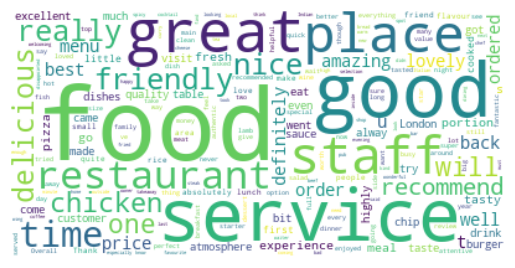

In [7]:
generate_wordcloud(new_df, 'Sentences')

In [8]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
nltk.download('stopwords')
nltk.download('punkt')
def create_word_frequency_table(df, column_name):
    # Define stopwords
    stop_words = set(stopwords.words('english'))
    # Remove stopwords and create frequency table
    word_freq = FreqDist()
    for text in df[column_name]:
        tokens = word_tokenize(text.lower())
        tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
        word_freq.update(tokens)
    # Print frequency table
    print("Word Frequency Table:")
    for word, freq in word_freq.most_common():
        print(f"{word}: {freq}")

create_word_frequency_table(new_df, 'Sentences')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macbookpro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/macbookpro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Word Frequency Table:
food: 35550
good: 18243
service: 16843
great: 15137
staff: 13397
place: 12977
restaurant: 10961
friendly: 9881
really: 9786
nice: 9783
delicious: 8974
would: 8833
chicken: 8096
time: 8040
recommend: 7547
one: 7330
also: 7114
amazing: 7112
back: 7073
best: 6637
definitely: 6609
like: 6599
lovely: 6447
ordered: 6412
well: 6208
us: 6001
order: 5774
menu: 5739
experience: 5495
go: 5132
tasty: 5042
fresh: 4625
atmosphere: 4569
get: 4550
meal: 4480
always: 4460
pizza: 4391
quality: 4387
london: 4351
even: 4155
excellent: 4129
could: 3936
try: 3873
made: 3865
dishes: 3830
highly: 3814
taste: 3789
came: 3745
come: 3569
went: 3542
chips: 3537
bit: 3520
got: 3380
eat: 3297
visit: 3295
much: 3243
little: 3237
price: 3217
first: 3172
table: 3152
cooked: 3120
absolutely: 3052
sauce: 2945
people: 2933
love: 2912
rice: 2850
burger: 2819
area: 2789
small: 2768
quite: 2750
customer: 2736
drinks: 2721
everything: 2696
lunch: 2689
overall: 2685
never: 2645
better: 2645
fish: 2595
se

In [9]:
df_sentiment_sort_neg = new_df.sort_values(by='neg', ascending=False)
df_sentiment_sort_neg.head(10)

,Restaurant_ID,User_ID,Sentences,Region,neg,neu,pos
138416,1111971,566e75b5-140d-4c82-a4b4-689ae06b65f4,AVOID!,South East,1.0,0.0,0.0
71465,5606387,14553297-f463-45ce-bf8a-fe776f5f7f84,Disappointing!,South West,1.0,0.0,0.0
13564,6610896,a2a74eb7-3a8f-4fee-b914-3abc4a4b7ef4,Disappointing.,Outer London,1.0,0.0,0.0
21838,7926867,894def30-875a-4158-9692-919f42383bc7,Disgusting.,South East,1.0,0.0,0.0
104399,1459308,aedcbfdd-5651-4afd-bbe8-e1b8536f79db,Questionable!,South East,1.0,0.0,0.0
140467,9690941,2f4f3d3c-c3ff-4178-8ce9-0f437f9276f9,HORRIBLE!,South East,1.0,0.0,0.0
153177,3313472,478d3d24-8b01-4456-80f5-5f3b669769a5,Sorry.,South West,1.0,0.0,0.0
115016,5688672,214f5147-a61b-4309-b7f1-4aefce678583,Avoid,South East,1.0,0.0,0.0
104401,1459308,c1593207-5566-4a17-b38e-120d908edc32,AWFUL!!!,South East,1.0,0.0,0.0
79569,1347891,a63cc11c-4f65-4291-80bd-fa7b8b1f221d,Shocking.,North,1.0,0.0,0.0


In [10]:
# Filter rows where 'neg' is greater than 0.5
filtered_data_negative_words = new_df[new_df['neg'] >= 0.5]
filtered_data_negative_words

,Restaurant_ID,User_ID,Sentences,Region,neg,neu,pos
217,3889411,6f73ba88-9e1d-47b4-b11f-ca783764e1bd,Pity!,South West,1.000,0.000,0.0
263,4588608,dcc647b4-cf4e-4895-b09c-1935daa64c9e,not so impressed.,West Central,0.581,0.419,0.0
390,8523154,1d3b24ce-8d7a-4791-8fdc-fb0089c370df,Horrible!!!,South West,1.000,0.000,0.0
398,8523154,acfb7dc5-0069-4e6c-9d23-e9b61c7bcb25,Afternoon tea was horrible.,South West,0.538,0.462,0.0
864,5867600,871edf29-7493-4fd2-843d-0aa918bc1edc,Hell NO!,Outer London,1.000,0.000,0.0
...,...,...,...,...,...,...,...
221781,9963830,d7dde065-0c70-4243-94d6-5059498f5e95,AVOID!,East,1.000,0.000,0.0
221958,6110088,748b8256-169d-41a7-b351-3750c477e6d5,Sadly can't recommend this place.,South West,0.621,0.379,0.0
222018,9188662,b5095064-1c2b-4a54-9ecf-227f4226c18a,No reservation required.,East,0.524,0.476,0.0
222169,9097685,12821f41-0b96-4760-b105-d30023792140,Overall disappointing experience.,East,0.615,0.385,0.0


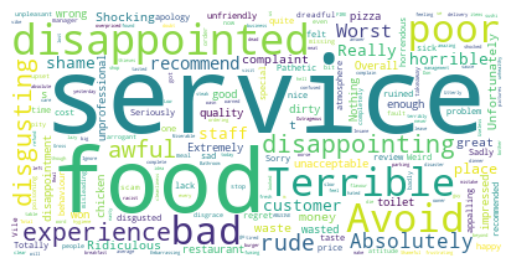

In [11]:
generate_wordcloud(filtered_data_negative_words, 'Sentences')

In [12]:
df_sentiment_sort_neg = new_df.sort_values(by='pos', ascending=False)
df_sentiment_sort_neg.head(10)

,Restaurant_ID,User_ID,Sentences,Region,neg,neu,pos
46127,5347825,efdc9cd5-7634-4f9e-bd49-dc69f21ca226,👍 Thanks.,East,0.0,0.0,1.0
147396,8720730,60fac5ae-9094-4aeb-8cc5-f7c4c33c9da2,Outstanding value.,South West,0.0,0.0,1.0
147555,5732708,9cf0d315-4261-405b-9ad1-b3a5ba77d8b3,Wow.,South West,0.0,0.0,1.0
124691,4839418,ff95dfe6-48f6-43b5-9817-f3b5f02de0e2,Definitely recommend,Outer London,0.0,0.0,1.0
195000,7218985,7b3c16db-d588-4de9-a8df-adc4f232058a,Thanks.,East Central,0.0,0.0,1.0
28545,2562519,989bcfea-0222-490e-9deb-576050e04323,Friendly security.,North West,0.0,0.0,1.0
137107,3800321,e937e7a7-af6e-44e6-81bb-a7da6a7e793c,Delicious!,South East,0.0,0.0,1.0
28536,2562519,3392f379-8765-478f-a5e0-4a06525af81c,Clean.,North West,0.0,0.0,1.0
50588,2274751,aaa99b21-5d78-4843-bfd8-045a04b1aa9b,Top,South West,0.0,0.0,1.0
166213,5620928,da1dac4a-2991-4407-8765-e1aa85640a08,Lovely energy.,South West,0.0,0.0,1.0


In [13]:
# Filter rows where 'pos' is greater than 0.5
filtered_data_good_words = new_df[new_df['pos'] >= 0.5]
filtered_data_good_words

,Restaurant_ID,User_ID,Sentences,Region,neg,neu,pos
0,3721442,61266865-f87a-494c-93a2-863521c90889,It was a lovely experience.,West,0.0,0.441,0.559
1,3721442,61266865-f87a-494c-93a2-863521c90889,"The teas were amazing, the food served very go...",West,0.0,0.396,0.604
4,3721442,be50e997-8ab0-4a31-90f6-365a628f0564,"Exquisite interior, lovely ambiance, delectabl...",West,0.0,0.342,0.658
9,3721442,be50e997-8ab0-4a31-90f6-365a628f0564,The teas I had here were truly amazing.,West,0.0,0.333,0.667
13,3721442,be50e997-8ab0-4a31-90f6-365a628f0564,The sandwiches were beautiful taste wise and a...,West,0.0,0.435,0.565
...,...,...,...,...,...,...,...
222304,7185282,651a4d33-e720-48ed-9260-03df733d8705,The staff are super friendly and very helpful.,East,0.0,0.329,0.671
222310,7185282,17a5ebfa-7a36-4bf8-878c-dc62d1acb222,Delicious and fast service.,East,0.0,0.448,0.552
222312,7185282,17a5ebfa-7a36-4bf8-878c-dc62d1acb222,Definitely recommend!,East,0.0,0.000,1.000
222333,4077196,2f8461d8-7e7e-4be6-8d74-0414fd3c124a,Recommended place.,East,0.0,0.357,0.643


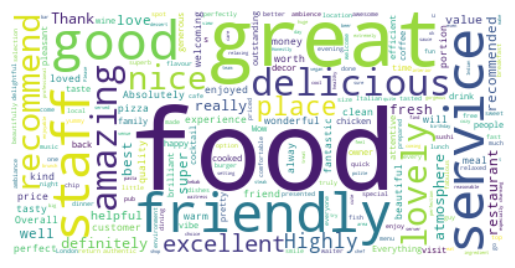

In [14]:
generate_wordcloud(filtered_data_good_words, 'Sentences')

In [15]:
reviews = new_df["Sentences"].tolist()
reviews
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import defaultdict
import pandas as pd

# Assuming you have loaded your review data into a DataFrame called 'df'
# df = pd.read_csv("your_reviews.csv")  # Replace with your actual CSV file

def preprocess_text(text):
    words = word_tokenize(str(text).lower())
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word.isalnum() and word not in stop_words]
    return words

def extract_keywords(reviews, num_keywords=5):
    keywords = defaultdict(int)
    for review in reviews:
        words = preprocess_text(review)
        for word in words:
            keywords[word] += 1
    top_keywords = dict(sorted(keywords.items(), key=lambda item: item[1], reverse=True)[:num_keywords])
    return top_keywords

def main():
    # reviews = df["Review"].tolist()
    num_keywords = 8000
    top_keywords = extract_keywords(reviews, num_keywords)
    keyword_list = list(top_keywords.keys())
    print("Top Keywords:")
    print(keyword_list)
    return keyword_list

if __name__ == "__main__":
    extracted_keywords = main()  # Call the main function and store the returned value
    print("Returned Keyword List:")
    print(extracted_keywords)


Top Keywords:
['food', 'good', 'service', 'great', 'staff', 'place', 'restaurant', 'friendly', 'really', 'nice', 'delicious', 'would', 'chicken', 'time', 'recommend', 'one', 'also', 'amazing', 'back', 'best', 'definitely', 'like', 'lovely', 'ordered', 'well', 'us', 'order', 'menu', 'experience', 'go', 'tasty', 'fresh', 'atmosphere', 'get', 'meal', 'always', 'pizza', 'quality', 'london', 'even', 'excellent', 'could', 'try', 'made', 'dishes', 'highly', 'taste', 'came', 'come', 'went', 'chips', 'bit', 'got', 'eat', 'visit', 'much', 'little', 'price', 'first', 'table', 'cooked', 'absolutely', 'sauce', 'people', 'love', 'rice', 'burger', 'area', 'small', 'quite', 'customer', 'drinks', 'everything', 'lunch', 'overall', 'never', 'better', 'fish', 'served', 'portion', 'ever', 'prices', 'worth', 'portions', 'dish', 'enjoyed', 'attentive', 'busy', 'meat', 'hot', 'dinner', 'fantastic', 'make', 'take', '2', 'tried', 'perfect', 'super', 'say', 'however', 'every', 'two', 'clean', 'family', 'day', 't

In [16]:
import spacy
# Load the spaCy English language model
nlp = spacy.load('en_core_web_sm')
# List of keywords (replace with your list of extracted keywords)
reviews = extracted_keywords

# Replace keyword_list in reviews with their part-of-speech tags
replaced_reviews = [nlp(keyword) for keyword in reviews]
# Extract nouns and adjectives from the list of replaced reviews, removing empty strings
nouns = [", ".join([token.text for token in review if token.pos_ == 'NOUN' and token.text != '']) for review in replaced_reviews if any(token.pos_ == 'NOUN' and token.text != '' for token in review)]
adjectives = [", ".join([token.text for token in review if token.pos_ == 'ADJ' and token.text != '']) for review in replaced_reviews if any(token.pos_ == 'ADJ' and token.text != '' for token in review)]
print("Extracted nouns:", nouns)
print('')
print("Extracted adjectives:", adjectives)

2023-09-14 05:28:47.568324: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Extracted nouns: ['food', 'service', 'staff', 'place', 'restaurant', 'chicken', 'time', 'order', 'menu', 'tasty', 'atmosphere', 'meal', 'pizza', 'quality', 'dishes', 'chips', 'bit', 'price', 'table', 'people', 'love', 'rice', 'burger', 'area', 'customer', 'drinks', 'lunch', 'fish', 'portion', 'prices', 'portions', 'meat', 'dinner', 'family', 'day', 'times', 'options', 'money', 'night', 'way', 'value', 'breakfast', 'friends', 'flavour', 'wine', 'evening', 'bread', 'beef', 'years', 'cheese', 'bar', 'selection', 'coffee', 'minutes', 'shop', 'home', 'side', 'fries', 'lot', 'spot', 'wings', 'tea', 'customers', 'dessert', 'restaurants', 'friend', 'delivery', 'music', 'steak', 'tables', 'birthday', 'crispy', 'location', 'size', 'starters', 'owner', 'manager', 'work', 'waiter', 'cocktails', 'chef', 'today', 'thing', 'flavours', 'burgers', 'gem', 'stars', 'ingredients', 'star', 'places', 'half', 'choice', 'end', 'pork', 'waitress', 'cafe', 'soup', 'team', 'reviews', 'thanks', 'pizzas', 'course'

In [17]:
food_keywords= ['food', 'chicken', 'order', 'menu', 'meal', 'pizza', 'quality', 'dishes', 'chips', 'rice', 'burger',  'drinks', 'lunch', 'fish', 'portion', 'portions', 'meat', 'dinner', 'breakfast', 'friends', 'flavour', 'wine', 'bread', 'beef', 'cheese', 'coffee', 'side', 'fries', 'lot', 'spot', 'wings', 'tea', 'steak','crispy', 'location', 'size', 'starters', 'cocktails', 'chef', 'flavours', 'burgers', 'gem','ingredients', 'half', 'pork', 'soup',  'pizzas', 'course', 'kitchen', 'variety', 'starter', 'noodles', 'guys', 'person', 'garlic', 'mains', 'items', 'brunch', 'cuisine', 'beer', 'option', 'orders', 'grill', 'water', 'bite', 'sizes', 'plate', 'prawns', 'cream',  'prawn', 'standard', 'plates', 'cozy','ice', 'superb', 'seafood', 'egg', 'style', 'rolls', 'pieces', 'salmon', 'garden', 'duck', 'salt', 'hope', 'oil', 'cake', 'mins', 'veg', 'chocolate', 'sauces', 'halal', 'waiters', 'eggs',  'flavors', 'butter', 'vegetables', 'toast', 'cocktail',  'potatoes', 'sides', 'sandwich', 'choices', 'bbq', 'bowl',  'toppings', 'mouth', 'onion', 'cook', 'potato', 'bacon', 'flavor', 'foods', 'sausage','mushroom', 'piece', 'paneer','beers',  'pie', 'sandwiches', 'pepper', 'masala', 'vibes', 'courses', 'ramen', 'vietnamese', 'wines', 'sea', 'kebabs', 'peas', 'shish', 'lemon', 'chewy', 'aubergine', 'chops', 'addition', 'pancakes', 'quantity', 'tiramisu', 'creamy', 'dumplings','juice', 'spices', 'vegetable', 'mushrooms',  'beans', 'none', 'bag', 'crab', 'milk', 'lobster', 'pot', 'onions', 'event', 'photo', 'belly', 'tuna', 'item', 'curries', 'meats', 'succulent', 'flavoursome', 'cakes', 'desert', 'heat', 'cup', 'chip', 'ham', 'loads', 'bone', 'wraps', 'steaks', 'girl', 'coconut', 'u', 'spaghetti',  'cheesecake', 'spinach', 'mash','buns', 'risotto','latte', 'roti', 'bits', 'balls', 'min', 'apple',  'mint', 'fruit', 'skin', 'stomach', 'chili', 'ginger', 'veggies', 'slices', 'honey',  'olives', 'shrimp', 'snacks', 'oysters', 'reception', 'cheesy', 'allergies',   'sausages',  'mussels', 'banana', 'cabbage', 'scones', 'corn', 'rib', 'vegetarians', 'gyoza',  'sugar', 'soy', 'charcoal', 'linguine', 'requests', 'coffees', 'broccoli',  'pitta', 'liver', 'pistachio', 'breast', 'teas', 'access', 'concept', 'comfort', 'energy', 'neighborhood', 'breakfasts', 'address', 'olive', 'pesto', 'juices',  'bones', 'herbs',  'wing', 'champagne',  'rings',  'pastas', 'cheeseburger', 'taco', 'bruschetta', 'nuggets', 'breads', 'cappuccino', 'vinegar', 'meatballs', 'soups',  'vanilla', 'pineapple', 'sweets', 'bubble','pickles', 'appetizer','vegans', 'caramel', 'carrot', 'diet', 'waffle', 'roasts', 'bars',  'bolognese', 'mayonnaise', 'jam', 'peanut', 'pumpkin', 'poppadoms', 'smoothies', 'lime', 'tray''wagyu','cookie', 'guacamole',  'gyros', 'waffles', 'mixture', 'sticks',  'recipe', 'fork', 'pm', 'risk', 'cafes', 'traffic', 'mcdonalds', 'yogurt', 'drop', 'quid', 'judge', 'pricy', 'pool', 'carrots', 'popcorn', 'boneless','plant','yam', 'mustard', 'napkins', 'protein', 'yoghurt' 'leg', 'churros', 'calzone',  'blood','ricotta','wasabi',  'pots','melts', 'nuts', 'powder', 'jasmine', 'cookies',  'peanuts', 'almond',  'lunches', 'chillies', 'cubes', 'seeds', 'cuisines', 'buttermilk', 'shrimps', 'overdone', 'spicier', 'instant', 'hamburger',  'appetiser', 'beverage', 'speciality', 'chickens', 'banquet', 'croissants', 'fruits', 'blueberry', 'desire', 'quantities', 'eggplant', 'creams',  'palm', 'bamboo',  'baguettes', 'takoyaki', 'vodka',  'icecream', 'wheat', 'candy', 'flights', 'components', 'munch', 'meetings', 'muffins', 'watermelon',  'chocolates', 'bull', 'mojitos',  'yakitori',  'donuts','hazelnut','doughnuts', 'chapati', 'arepa', 'critique', 'yakisoba', 'golders', 'boards',  'aubergines', 'leeks',  'specialities', 'jams',  'hotdog',  'marshmallows','teapot','buffets', 'hotdogs', 'nutrition', 'oranges', 'brocoli', 'shelves', 'causal', 'kiwi', 'kebap', 'oils','good', 'great', 'nice', 'delicious', 'amazing', 'fresh', 'excellent', 'little', 'small', 'hot', 'fantastic', 'perfect', 'special', 'full', 'big','bad', 'warm', 'wonderful', 'italian', 'main', 'spicy', 'large', 'cold', 'sweet', 'dry', 'extra', 'available', 'incredible','old', 'poor', 'plenty', 'fine', 'huge', 'exceptional', 'soft', 'worst', 'disappointing', 'outstanding', 'regular', 'traditional','green', 'terrible', 'fair', 'awful', 'salty', 'tiny', 'tasteless', 'flavourful', 'sour', 'rich', 'dirty', 'low', 'korean', 'medium','horrible', 'healthy','soggy', 'impeccable','thin', 'strong', 'flavorful', 'frozen', 'gorgeous', 'impressive', 'fancy', 'crunchy', 'massive', 'thick', 'sticky', 'stunning', 'smaller','bigger', 'genuine', 'extensive', 'complete', 'various', 'similar', 'weird',  'ideal', 'bottomless', 'solid', 'watery', 'dark', 'caribbean', 'dietary', 'inedible', 'sick', 'odd', 'fat', 'additional', 'smooth', 'elegant', 'delectable', 'heavy', 'larger', 'hearty', 'strange', 'mild', 'nicest', 'royal', 'edible', 'udon', 'bitter', 'tasteful', 'unusual', 'biggest', 'suitable', 'exciting', 'eastern', 'appalling', 'final', 'extraordinary', 'pakistani', 'unpleasant', 'savory',  'wild', 'aromatic', 'uncooked', 'grateful', 'finest', 'unexpected', 'worthy',  'tastiest', 'chippy', 'adequate', 'ordinary', 'croissant','hygienic', 'secret', 'complementary', 'innovative', 'unhygienic','greatest', 'satisfactory', 'mouthful', 'allergic', 'sloppy','warmer', 'colourful', 'filthy', 'attractive', 'pleasing','proud','aesthetic', 'essential','definite', 'eager', 'unreal', 'smallest', 'appropriate', 'dull', 'inexpensive', 'puree', 'magical', 'bottled', 'garnish', 'terrific',  'excessive', 'organic', 'tastier', 'rotten', 'german', 'historic',  'addictive', 'distinct', 'healthier', 'constructive', 'marvellous', 'greedy', 'lighter','dissatisfied','sufficient','thicker', 'worthwhile', 'enormous', 'sharp', 'dismissive', 'dangerous', 'southern', 'latest','fishy', 'glorious', 'nostalgic', 'muslim', 'festive', 'desperate', 'unbeatable', 'unavailable', 'international', 'ultimate','western', 'unreasonable', 'fortunate', 'sambar', 'oriental',  'barbican', 'grated',  'arabic', 'greater', 'moderate', 'classical', 'marvelous', 'thinner', 'unfair', 'jamun',  'sweeter', 'saltfish', 'afghani','competent', 'testy','artificial', 'native', 'national', 'scottish', 'gracious', 'unhealthy', 'garlicky','dhansak', 'milky', 'pleasurable', 'harmonious', 'nutritious', 'presentable','acidic',  'warmest', 'softer', 'lavish','tabbouleh',  'precise', 'adamant', 'contrary', 'eatable','unimpressed', 'noteworthy', 'delicous', 'underdone', 'sizeable', 'sambal', 'skilled', 'incomplete', 'nutritional', 'nauseous',  'drinkable', 'creaminess', 'bengal', 'astounding', 'bruno','hungry', 'lightest', 'instagrammable', 'recommendable', 'stinky', 'transparent', 'noticeable', 'unsatisfactory', 'poppy', 'insufficient', 'artistic', 'syrian','yummiest', 'newer', 'marugame', 'argentine','scenic', 'carb', 'regional','largest','dansak','belgian', 'herbal', 'unwell', 'distasteful', 'hottest', 'orecchiette', 'favourable', 'ukrainian', 'sambhar', 'intriguing', 'thirsty','uneatable','strongest', 'spiciest', 'lemongrass']
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
service_keywords = ['service', 'staff', 'customers', 'waiter', 'waitress', 'team', 'guys', 'person', 'server', 'phone',  'attention', 'man', 'waiters', 'houmous','owners', 'member', 'chefs', 'members', 'inappropriate', 'attitude', 'staffs', 'servers', 'host', 'disappointment', 'services', 'experiences', 'response', 'waitresses', 'manner', 'workers', 'employees', 'offerings', 'preparation', 'boss', 'kindness', 'delay', 'worker', 'speed', 'hosts',  'servings', 'interaction', 'behavior', 'treatment', 'personality',  'dedication', 'assistant', 'supervisor', 'receptionist', 'ridiculous', 'unprofessional', 'unacceptable', 'acceptable',  'careful', 'annoying', 'hospitable',  'thoughtful', 'crazy', 'humble',   'smiley', 'lazy', 'sophisticated', 'innovative', 'reliable', 'stingy', 'informative', 'disrespectful', 'aggressive', 'friendliest','useless', 'insane', 'pathetic', 'satisfactory', 'mouthful', 'sloppy', 'enthusiastic', 'gentle', 'packet', 'proud', 'horrendous', 'dedicated', 'intrusive', 'arrogant',  'eager', 'weak', 'disgraceful', 'dreadful', 'needless',  'frustrating', 'unhappy', 'appropriate', 'terrific', 'approachable', 'pretentious', 'unhelpful', 'dissatisfied',  'exotic', 'useful', 'pro', 'supportive', 'kindest', 'cordial', 'gracious', 'pleasurable', 'inexperienced', 'mindful',  'rudest', 'buggy', 'sociable', 'rapid', 'quickest', 'indifferent', 'cautious', 'modest', 'manageable', 'unobtrusive',  'petty', 'indecisive', 'crumb', 'demeanour', 'impolite', 'passive', 'distasteful', 'demeanour', 'hospitality', "quickly", "mins", "minutes", "waiting", 'wait']

ambience_keywords = ['atmosphere', 'area',  'vibe', 'ambience', 'space', 'house', 'room', 'ambiance',  'cozy', 'style', 'door', 'table', 'tables', 'seat', 'seats', 'chairs', 'chair', 'cosy', 'view', 'vibes', 'downstairs', 'hill', 'views', 'terrace', 'window', 'costs', 'mood',  'entertainment', 'light', 'doors', 'surroundings',  'safety', 'joy', 'rooms', 'stairs', 'noise', 'subway', 'windows', 'palace', 'airy',  'warmth',  'bathrooms', 'ceiling', 'doorstep', 'privacy', 'stalls', 'exterior', 'forest',  'bustle', 'peace', 'spaces', 'heaters', 'riverside', 'piano', 'sky', 'edges', 'gate', 'tree', 'flies', 'neck', 'images', 'arrangements', 'wifi', 'ambient', 'aspects',  'seatings', 'washroom', 'ceilings',  'zone','jungle', 'books', 'renovation', 'aesthetics', 'dust', 'wind', 'ventilation', 'novel', 'conditions', 'novelty', 'climate', 'hill','mirrors', 'fields', 'seaside', 'workplace', 'steakhouses', 'umbrella', 'overground','landmarks', 'vision','cheer', 'silence',  'discomfort', 'monk', 'woody', 'mirror', 'frame', 'cleanse', 'fragrance','lovely', 'busy', 'authentic', 'warm', 'wonderful', 'old','traditional', 'quiet', 'green', 'comfortable','easy', 'simple', 'light', 'delightful', 'unique', 'enjoyable', 'empty', 'cool', 'outdoor','dirty', 'modern', 'spacious', 'convenient', 'lively', 'phenomenal', 'vibrant', 'bright', 'sunny', 'spectacular', 'uncomfortable', 'elegant', 'romantic', 'creative', 'safe', 'comfy', 'indoor',  'cheerful', 'interested', 'careful', 'evident', 'annoying', 'unpleasant',  'delicate',  'classy', 'rustic', 'diverse', 'fussy', 'natural', 'aromatic', 'neat', 'peaceful', 'keen', 'messy','wooden',  'innovative', 'busier', 'warmer', 'colourful', 'attractive', 'aesthetic', 'approachable', 'luxurious', 'iconic', 'exotic', 'glorious',  'nostalgic', 'cleanest', 'classical', 'marvelous',  'outer', 'busiest', 'floral', 'unmatched', 'bizarre', 'hectic', 'polished', 'pleasurable', 'harmonious',  'picturesque',  'colorful', 'internal',   'distinctive', 'warmest',  'lavish', 'alive', 'cutty', 'slightest', 'unimpressed', 'cutest', 'fascinating', 'unclean', 'windy', 'historical', 'visual',  'musical', 'hostile', 'minimalistic',  'modest', 'playful', 'lightest',  'artistic',  'environmental', 'scenic', 'active', 'regional', 'shiny',  'décor', 'decoration', 'chaotic', 'environmental', 'scenic']

price_keywords = ['price', 'price', 'prices', 'money', 'pricing', 'discount', 'discounts', 'tips', 'tip', 'costs', 'promotion', 'pricey', 'discounts','pricy', 'pricier', 'payment', 'payments', 'voucher','vouchers', 'affordable', 'cheap', 'cheaper', 'expensive', 'inexpensive', 'costly', 'cost', 'resonable', 'cash', 'card']

In [18]:
categorize_df = new_df.iloc[:, :4]
categorize_df

,Restaurant_ID,User_ID,Sentences,Region
0,3721442,61266865-f87a-494c-93a2-863521c90889,It was a lovely experience.,West
1,3721442,61266865-f87a-494c-93a2-863521c90889,"The teas were amazing, the food served very go...",West
2,3721442,61266865-f87a-494c-93a2-863521c90889,"Two things I didn’t like are, the seats, so sm...",West
3,3721442,61266865-f87a-494c-93a2-863521c90889,And the other is that despite the fact that th...,West
4,3721442,be50e997-8ab0-4a31-90f6-365a628f0564,"Exquisite interior, lovely ambiance, delectabl...",West
...,...,...,...,...
222340,4077196,77b09026-7310-4cde-9e19-474f16ac6a1f,I appreciate the wide selection of Vietnamese ...,East
222341,4077196,77b09026-7310-4cde-9e19-474f16ac6a1f,My favorite was the order of Achovied Chicken ...,East
222342,4077196,77b09026-7310-4cde-9e19-474f16ac6a1f,"If you want rice, definitely have it with a se...",East
222343,4077196,77b09026-7310-4cde-9e19-474f16ac6a1f,"For the more health-conscious foodie, a warm b...",East


In [19]:
def extract_related_sentences(text, keywords):
    if isinstance(text, str):
        sentences = text.split('. ')
        related_sentences = [sentence for sentence in sentences if any(keyword in sentence.lower() for keyword in keywords)]
        return '. '.join(related_sentences)
    else:
        return ""
    
categorize_df['Food_Related_Sentences'] = categorize_df['Sentences'].apply(lambda x: extract_related_sentences(x, food_keywords))
categorize_df['Service_Related_Sentences'] = categorize_df['Sentences'].apply(lambda x: extract_related_sentences(x, service_keywords))
categorize_df['Ambience_Related_Sentences'] = categorize_df['Sentences'].apply(lambda x: extract_related_sentences(x, ambience_keywords))
categorize_df['Price_Related_Sentences'] = categorize_df['Sentences'].apply(lambda x: extract_related_sentences(x, price_keywords))

categorize_df


,Restaurant_ID,User_ID,Sentences,Region,Food_Related_Sentences,Service_Related_Sentences,Ambience_Related_Sentences,Price_Related_Sentences
0,3721442,61266865-f87a-494c-93a2-863521c90889,It was a lovely experience.,West,,,It was a lovely experience.,
1,3721442,61266865-f87a-494c-93a2-863521c90889,"The teas were amazing, the food served very go...",West,"The teas were amazing, the food served very go...",,,
2,3721442,61266865-f87a-494c-93a2-863521c90889,"Two things I didn’t like are, the seats, so sm...",West,"Two things I didn’t like are, the seats, so sm...",,"Two things I didn’t like are, the seats, so sm...",
3,3721442,61266865-f87a-494c-93a2-863521c90889,And the other is that despite the fact that th...,West,And the other is that despite the fact that th...,And the other is that despite the fact that th...,,
4,3721442,be50e997-8ab0-4a31-90f6-365a628f0564,"Exquisite interior, lovely ambiance, delectabl...",West,"Exquisite interior, lovely ambiance, delectabl...",,"Exquisite interior, lovely ambiance, delectabl...",
...,...,...,...,...,...,...,...,...
222340,4077196,77b09026-7310-4cde-9e19-474f16ac6a1f,I appreciate the wide selection of Vietnamese ...,East,I appreciate the wide selection of Vietnamese ...,,,
222341,4077196,77b09026-7310-4cde-9e19-474f16ac6a1f,My favorite was the order of Achovied Chicken ...,East,My favorite was the order of Achovied Chicken ...,,,
222342,4077196,77b09026-7310-4cde-9e19-474f16ac6a1f,"If you want rice, definitely have it with a se...",East,"If you want rice, definitely have it with a se...",,,
222343,4077196,77b09026-7310-4cde-9e19-474f16ac6a1f,"For the more health-conscious foodie, a warm b...",East,"For the more health-conscious foodie, a warm b...",,"For the more health-conscious foodie, a warm b...",


In [20]:
categorize_df.to_excel('categorize_df.xlsx', index=False)

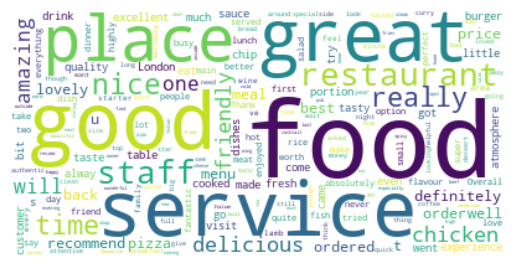

In [21]:
generate_wordcloud(categorize_df, 'Food_Related_Sentences')

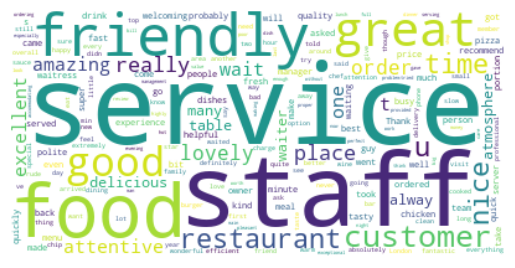

In [22]:
generate_wordcloud(categorize_df, 'Service_Related_Sentences')

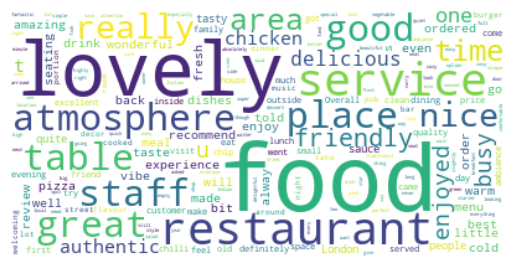

In [23]:
generate_wordcloud(categorize_df, 'Ambience_Related_Sentences')

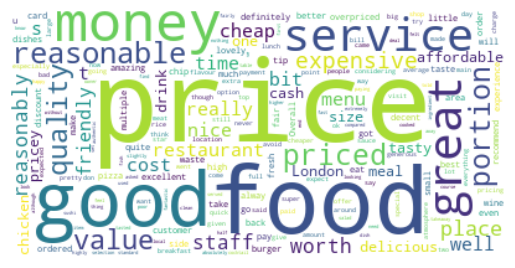

In [24]:
generate_wordcloud(categorize_df, 'Price_Related_Sentences')

In [40]:
def get_category_sentences(restaurant_id):
    restaurant_df = categorize_df[categorize_df["Restaurant_ID"] == restaurant_id]
    food_sentences = restaurant_df["Food_Related_Sentences"].tolist()
    service_sentences = restaurant_df["Service_Related_Sentences"].tolist()
    ambience_sentences = restaurant_df["Ambience_Related_Sentences"].tolist()
    price_sentences = restaurant_df["Price_Related_Sentences"].tolist()
    return food_sentences, service_sentences, ambience_sentences, price_sentences
# Example: Get sentences for Restaurant ID 6753928
restaurant_id = int(input("Enter Restaurant ID: "))
food_sentences, service_sentences, ambience_sentences, price_sentences = get_category_sentences(restaurant_id)
print("Food Sentences:", food_sentences)
print("")
print("Service Sentences:", service_sentences)
print("")
print("Ambience Sentences:", ambience_sentences)
print("")
print("Price Sentences:", price_sentences)
print("")

Enter Restaurant ID: 6753928
Food Sentences: ['We were standing outside looking at the menu in the window and two Vietnamese men having a smoke break saw us and casually recommended the restaurant, saying it is authentic.', 'Needless to say we were sold!', 'Ended up having an excellent experience at Nom Nom.', 'Food was delicious, so flavoursome and also great value!', 'Service was very friendly.', 'Would definitely go back.', 'Lovely service in a cute restaurant.', 'Food is really fresh and nice.', "We've been to Vietnam and it does taste authentic.", 'The pancakes were amazing.', 'They also had bahn con, my absolute favourite!!!!', '(Soft rice rolls).', 'Pho was also very good', 'Very tasty Vietnamese food in this clean and bright restaurant.', 'Friendly welcoming staff and reasonable prices.', 'The mixed platter was fresh and delicious.', 'Good vegan options too.', 'Delicious food, great quality, staff were friendly and provided a good service.', 'Was my first time trying Vietnamese

Food: ['food', 'chicken', 'order', 'menu', 'meal', 'pizza', 'quality', 'dishes', 'chips', 'rice', 'burger',  'drinks', 'lunch', 'fish', 'portion', 'portions', 'meat', 'dinner', 'breakfast', 'friends', 'flavour', 'wine', 'bread', 'beef', 'cheese', 'coffee', 'side', 'fries', 'lot', 'spot', 'wings', 'tea', 'steak','crispy', 'location', 'size', 'starters', 'cocktails', 'chef', 'flavours', 'burgers', 'gem','ingredients', 'half', 'pork', 'soup',  'pizzas', 'course', 'kitchen', 'variety', 'starter', 'noodles', 'guys', 'person', 'garlic', 'mains', 'items', 'brunch', 'cuisine', 'beer', 'option', 'orders', 'grill', 'water', 'bite', 'sizes', 'plate', 'prawns', 'cream',  'prawn', 'standard', 'plates', 'cozy','ice', 'superb', 'seafood', 'egg', 'style', 'rolls', 'pieces', 'salmon', 'garden', 'duck', 'salt', 'hope', 'oil', 'cake', 'mins', 'veg', 'chocolate', 'sauces', 'halal', 'waiters', 'eggs',  'flavors', 'butter', 'vegetables', 'toast', 'cocktail',  'potatoes', 'sides', 'sandwich', 'choices', 'bbq', 'bowl',  'toppings', 'mouth', 'onion', 'cook', 'potato', 'bacon', 'flavor', 'foods', 'sausage','mushroom', 'piece', 'paneer','beers',  'pie', 'sandwiches', 'pepper', 'masala', 'vibes', 'courses', 'ramen', 'vietnamese', 'wines', 'sea', 'kebabs', 'peas', 'shish', 'lemon', 'chewy', 'aubergine', 'chops', 'addition', 'pancakes', 'quantity', 'tiramisu', 'creamy', 'dumplings','juice', 'spices', 'vegetable', 'mushrooms',  'beans', 'none', 'bag', 'crab', 'milk', 'lobster', 'pot', 'onions', 'event', 'photo', 'belly', 'tuna', 'item', 'curries', 'meats', 'succulent', 'flavoursome', 'cakes', 'desert', 'heat', 'cup', 'chip', 'ham', 'loads', 'bone', 'wraps', 'steaks', 'girl', 'coconut', 'u', 'spaghetti',  'cheesecake', 'spinach', 'mash','buns', 'risotto','latte', 'roti', 'bits', 'balls', 'min', 'apple',  'mint', 'fruit', 'skin', 'stomach', 'chili', 'ginger', 'veggies', 'slices', 'honey',  'olives', 'shrimp', 'snacks', 'oysters', 'reception', 'cheesy', 'allergies',   'sausages',  'mussels', 'banana', 'cabbage', 'scones', 'corn', 'rib', 'vegetarians', 'gyoza',  'sugar', 'soy', 'charcoal', 'linguine', 'requests', 'coffees', 'broccoli',  'pitta', 'liver', 'pistachio', 'breast', 'teas', 'access', 'concept', 'comfort', 'energy', 'neighborhood', 'breakfasts', 'address', 'olive', 'pesto', 'juices',  'bones', 'herbs',  'wing', 'champagne',  'rings',  'pastas', 'cheeseburger', 'taco',, 'bruschetta', 'nuggets', 'breads', 'cappuccino', 'vinegar', 'meatballs', 'soups',  'vanilla', 'pineapple', 'sweets', 'bubble','pickles', 'appetizer','vegans', 'caramel', 'carrot', 'diet', 'waffle', 'roasts', 'bars',  'bolognese', 'mayonnaise', 'jam', 'peanut', 'pumpkin', 'poppadoms', 'smoothies', 'lime', 'tray''wagyu','cookie', 'guacamole',  'gyros', 'waffles', 'mixture', 'sticks',  'recipe', 'fork', 'pm', 'risk', 'cafes', 'traffic', 'mcdonalds', 'yogurt', 'drop', 'quid', 'judge', 'pricy', 'pool', 'carrots', 'popcorn', 'boneless','plant','yam', 'mustard', 'napkins', 'protein', 'yoghurt' 'leg', 'churros', 'calzone',  'blood','ricotta','wasabi',  'pots','melts', 'nuts', 'powder', 'jasmine', 'cookies',  'peanuts', 'almond',  'lunches', 'chillies', 'cubes', 'seeds', 'cuisines', 'buttermilk', 'shrimps', 'overdone', 'spicier', 'instant', 'hamburger',  'appetiser', 'beverage', 'speciality', 'chickens', 'banquet', 'croissants', 'fruits', 'blueberry', 'desire', 'quantities', 'eggplant', 'creams',  'palm', 'bamboo',  'baguettes', 'takoyaki', 'vodka',  'icecream', 'wheat', 'candy', 'flights', 'components', 'munch', 'meetings', 'muffins', 'watermelon',  'chocolates', 'bull', 'mojitos',  'yakitori',  'donuts','hazelnut','doughnuts', 'chapati', 'arepa', 'critique', 'yakisoba', 'golders', 'boards',  'aubergines', 'leeks',  'specialities', 'jams',  'hotdog',  'marshmallows','teapot','buffets', 'hotdogs', 'nutrition', 'oranges', 'brocoli', 'shelves', 'causal', 'kiwi', 'kebap', 'oils','good', 'great', 'nice', 'delicious', 'amazing', 'fresh', 'excellent', 'little', 'small', 'hot', 'fantastic', 'perfect', 'special', 'full', 'big','bad', 'warm', 'wonderful', 'italian', 'main', 'spicy', 'large', 'cold', 'sweet', 'dry', 'extra', 'available', 'incredible','old', 'poor', 'plenty', 'fine', 'huge', 'exceptional', 'soft', 'worst', 'disappointing', 'outstanding', 'regular', 'traditional','green', 'terrible', 'fair', 'awful', 'salty', 'tiny', 'tasteless', 'flavourful', 'sour', 'rich', 'dirty', 'low', 'korean', 'medium','horrible', 'healthy','soggy', 'impeccable','thin', 'strong', 'flavorful', 'frozen', 'gorgeous', 'impressive', 'fancy', 'crunchy', 'massive', 'thick', 'sticky', 'stunning', 'smaller','bigger', 'genuine', 'extensive', 'complete', 'various', 'similar', 'weird',  'ideal', 'bottomless', 'solid', 'watery', 'dark', 'caribbean', 'dietary', 'inedible', 'sick', 'odd', 'fat', 'additional', 'smooth', 'elegant', 'delectable', 'heavy', 'larger', 'hearty', 'strange', 'mild', 'nicest', 'royal', 'edible', 'udon', 'bitter', 'tasteful', 'unusual', 'biggest', 'suitable', 'exciting', 'eastern', 'appalling', 'final', 'extraordinary', 'pakistani', 'unpleasant', 'savory',  'wild', 'aromatic', 'uncooked', 'grateful', 'finest', 'unexpected', 'worthy',  'tastiest', 'chippy', 'adequate', 'ordinary', 'croissant','hygienic', 'secret', 'complementary', 'innovative', 'unhygienic','greatest', 'satisfactory', 'mouthful', 'allergic', 'sloppy','warmer', 'colourful', 'filthy', 'attractive', 'pleasing','proud','aesthetic', 'essential','definite', 'eager', 'unreal', 'smallest', 'appropriate', 'dull', 'inexpensive', 'puree', 'magical', 'bottled', 'garnish', 'terrific',  'excessive', 'organic', 'tastier', 'rotten', 'german', 'historic',  'addictive', 'distinct', 'healthier', 'constructive', 'marvellous', 'greedy', 'lighter','dissatisfied','sufficient','thicker', 'worthwhile', 'enormous', 'sharp', 'dismissive', 'dangerous', 'southern', 'latest','fishy', 'glorious', 'nostalgic', 'muslim', 'festive', 'desperate', 'unbeatable', 'unavailable', 'international', 'ultimate','western', 'unreasonable', 'fortunate', 'sambar', 'oriental',  'barbican', 'grated',  'arabic', 'greater', 'moderate', 'classical', 'marvelous', 'thinner', 'unfair', 'jamun',  'sweeter', 'saltfish', 'afghani','competent', 'testy','artificial', 'native', 'national', 'scottish', 'gracious', 'unhealthy', 'garlicky','dhansak', 'milky', 'pleasurable', 'harmonious', 'nutritious', 'presentable','acidic',  'warmest', 'softer', 'lavish','tabbouleh',  'precise', 'adamant', 'contrary', 'eatable','unimpressed', 'noteworthy', 'delicous', 'underdone', 'sizeable', 'sambal', 'skilled', 'incomplete', 'nutritional', 'nauseous',  'drinkable', 'creaminess', 'bengal', 'astounding', 'bruno','hungry', 'lightest', 'instagrammable', 'recommendable', 'stinky', 'transparent', 'noticeable', 'unsatisfactory', 'poppy', 'insufficient', 'artistic', 'syrian','yummiest', 'newer', 'marugame', 'argentine','scenic', 'carb', 'regional','largest','dansak','belgian', 'herbal', 'unwell', 'distasteful', 'hottest', 'orecchiette', 'favourable', 'ukrainian', 'sambhar', 'intriguing', 'thirsty','uneatable','strongest', 'spiciest', 'lemongrass']

Ambience: ['atmosphere', 'area', 'table', 'tables',  'vibe', 'ambience', 'space', 'house', 'room', 'ambiance',  'cozy', 'style', 'door', 'cosy', 'view', 'vibes', 'downstairs', 'hill', 'views', 'terrace', 'window', 'costs', 'mood',  'entertainment', 'light', 'doors', 'surroundings',  'safety', 'joy', 'rooms', 'stairs', 'noise', 'subway', 'windows', 'palace', 'airy',  'warmth',  'bathrooms', 'ceiling', 'doorstep', 'privacy', 'stalls', 'exterior', 'forest',  'bustle', 'peace', 'spaces', 'heaters', 'riverside', 'piano', 'sky', 'edges', 'gate', 'tree', 'flies', 'neck', 'images', 'arrangements', 'wifi', 'ambient', 'aspects',  'seatings', 'washroom', 'ceilings',  'zone','jungle', 'books', 'renovation', 'aesthetics', 'dust', 'wind', 'ventilation', 'novel', 'conditions', 'novelty', 'climate', 'hill','mirrors', 'fields', 'seaside', 'workplace', 'steakhouses', 'umbrella', 'overground','landmarks', 'vision','cheer', 'silence',  'discomfort', 'monk', 'woody', 'mirror', 'frame', 'cleanse', 'fragrance','lovely', 'busy', 'authentic', 'warm', 'wonderful', 'old','traditional', 'quiet', 'green', 'comfortable','easy', 'simple', 'light', 'delightful', 'unique', 'enjoyable', 'empty', 'cool', 'outdoor','dirty', 'modern', 'spacious', 'convenient', 'lively', 'phenomenal', 'vibrant', 'bright', 'sunny', 'spectacular', 'uncomfortable', 'elegant', 'romantic', 'creative', 'safe', 'comfy', 'indoor',  'cheerful', 'interested', 'careful', 'evident', 'annoying', 'unpleasant',  'delicate',  'classy', 'rustic', 'diverse', 'fussy', 'natural', 'aromatic', 'neat', 'peaceful', 'keen', 'messy','wooden',  'innovative', 'busier', 'warmer', 'colourful', 'attractive', 'aesthetic', 'approachable', 'luxurious', 'iconic', 'exotic', 'glorious',  'nostalgic', 'cleanest', 'classical', 'marvelous',  'outer', 'busiest', 'floral', 'unmatched', 'bizarre', 'hectic', 'polished', 'pleasurable', 'harmonious',  'picturesque',  'colorful', 'internal',   'distinctive', 'warmest',  'lavish', 'alive', 'cutty', 'slightest', 'unimpressed', 'cutest', 'fascinating', 'unclean', 'windy', 'historical', 'visual',  'musical', 'hostile', 'minimalistic',  'modest', 'playful', 'lightest',  'artistic',  'environmental', 'scenic', 'active', 'regional', 'shiny',  'décor', 'decoration', 'chaotic', 'environmental', 'scenic']

Service: ['service', 'staff', 'customers', 'waiter', 'waitress', 'team', 'guys', 'person', 'server', 'phone',  'attention', 'man', 'waiters', 'houmous','owners', 'member', 'chefs', 'members', 'attitude', 'staffs', 'servers', 'host', 'disappointment', 'services', 'experiences', 'response', 'waitresses', 'manner', 'workers', 'employees', 'offerings', 'preparation', 'boss', 'kindness', 'delay', 'worker', 'speed', 'hosts',  'servings', 'interaction', 'behavior', 'treatment', 'personality',  'dedication', 'assistant', 'supervisor', 'receptionist', 'ridiculous', 'unprofessional', 'unacceptable', 'acceptable',  'careful', 'annoying', 'hospitable',  'thoughtful', 'crazy', 'humble',   'smiley', 'lazy', 'sophisticated', 'innovative', 'reliable', 'stingy', 'informative', 'disrespectful', 'aggressive', 'friendliest','useless', 'insane', 'pathetic', 'satisfactory', 'mouthful', 'sloppy', 'enthusiastic', 'gentle', 'packet', 'proud', 'horrendous', 'dedicated', 'intrusive', 'arrogant',  'eager', 'weak', 'disgraceful', 'dreadful', 'needless',  'frustrating', 'unhappy', 'appropriate', 'terrific', 'approachable', 'pretentious', 'unhelpful', 'dissatisfied',  'exotic', 'useful', 'pro', 'supportive', 'kindest', 'cordial', 'gracious', 'pleasurable', 'inexperienced', 'mindful',  'rudest', 'buggy', 'sociable', ''rapid', 'quickest', 'indifferent', 'cautious', 'modest', 'manageable', 'unobtrusive',  'petty', 'indecisive', 'crumb', 'demeanour', 'impolite', 'passive', 'distasteful', 'demeanour', 'hospitality']

Price: ['price', 'prices', 'money', 'pricing', 'discount', 'discounts', 'tips', 'tip', 'costs', 'promotion', 'pricey', 'discounts','pricy', 'pricier', 'payment', 'payments', 'voucher','vouchers', 'affordable', 'cheap', 'cheaper', 'expensive', 'inexpensive', 'costly', 'cost', 'resonable', 'cash', 'card']



Time: ['minutes', 'times','time', 'hour', 'week', 'hours', 'mins', 'year', 'years', 'moment', 'occasion',  'weekend', 'morning', 'minute', 'weeks', 'min', 'weekends', 'pm', 'weekly', 'quick', 'quickly', 'rapid', 'slow', 'slowly', 'wait', 'waiting', 'hr'] 




Extracted nouns: ['food', 'service', 'staff', 'place', 'restaurant', 'chicken', 'time', 'order', 'menu', 'tasty', 'atmosphere', 'meal', 'pizza', 'quality', 'dishes', 'chips', 'bit', 'price', 'table', 'people', 'love', 'rice', 'burger', 'area', 'customer', 'drinks', 'lunch', 'fish', 'portion', 'prices', 'portions', 'meat', 'dinner', 'family', 'day', 'times', 'options', 'money', 'night', 'way', 'value', 'breakfast', 'friends', 'flavour', 'wine', 'evening', 'bread', 'beef', 'years', 'cheese', 'bar', 'selection', 'coffee', 'minutes', 'shop', 'home', 'side', 'fries', 'lot', 'spot', 'wings', 'tea', 'customers', 'dessert', 'restaurants', 'friend', 'delivery', 'music', 'steak', 'tables', 'birthday', 'crispy', 'location', 'size', 'starters', 'owner', 'manager', 'work', 'waiter', 'cocktails', 'chef', 'today', 'thing', 'flavours', 'burgers', 'gem', 'stars', 'ingredients', 'star', 'places', 'half', 'choice', 'end', 'pork', 'waitress', 'cafe', 'soup', 'team', 'reviews', 'thanks', 'pizzas', 'course', 'kitchen', 'lots', 'variety', 'starter', 'review', 'rude', 'pleasant', 'bill', 'noodles', 'guys', 'person', 'garlic', 'vibe', 'mains', 'things', 'items', 'brunch', 'cuisine', 'ambience', 'space', 'house', 'couple', 'amount', 'kids', 'afternoon', 'beer', 'option', 'group', 'hour', 'room', 'orders', 'grill', 'front', 'water', 'bite', 'sizes', 'plate', 'prawns', 'cream', 'partner', 'week', 'ambiance', 'party', 'prawn', 'server', 'standard', 'perfection', 'station', 'plates', 'business', 'cozy', 'phone', 'ice', 'superb', 'seafood', 'part', 'guy', 'egg', 'style', 'platter', 'branch', 'door', 'cosy', 'rolls', 'hours', 'pieces', 'attention', 'salmon', 'garden', 'days', 'duck', 'parking', 'presentation', 'shame', 'salt', 'hope', 'oil', 'wife', 'finish', 'level', 'road', 'range', 'others', 'rest', 'park', 'cake', 'japanese', 'mins', 'fun', 'veg', 'chocolate', 'share', 'environment', 'name', 'sauces', 'year', 'man', 'halal', 'waiters', 'hotel', 'eggs', 'book', 'issue', 'past', 'reason', 'deal', 'view', 'glass', 'flavors', 'butter', 'expectations', 'husband', 'vegetables', 'toast', 'cocktail', 'moment', 'potatoes', 'sides', 'fact', 'sandwich', 'cash', 'choices', 'bbq', 'bowl', 'life', 'list', 'toppings', 'owners', 'mouth', 'management', 'number', 'reservation', 'onion', 'cook', 'world', 'online', 'ones', 'toilets', 'potato', 'uber', 'guests', 'problem', 'bacon', 'flavor', 'establishment', 'foods', 'date', 'town', 'member', 'dog', 'pleasure', 'classic', 'hands', 'ribs', 'mind', 'fan', 'surprise', 'waste', 'heart', 'stuff', 'dough', 'spring', 'recommendations', 'sausage', 'king', 'mushroom', 'piece', 'paneer', 'hospitality', 'toilet', 'greek', 'chefs', 'beers', 'floor', 'yesterday', 'occasion', 'pie', 'market', 'members', 'card', 'sandwiches', 'children', 'texture', 'trip', 'pepper', 'job', 'weekend', 'morning', 'masala', 'vibes', 'daughter', 'courses', 'pictures', 'ramen', 'driver', 'vietnamese', 'wines', 'sea', 'chance', 'summer', 'queue', 'attitude', 'seats', 'future', 'picture', 'greasy', 'base', 'city', 'kebabs', 'opinion', 'combination', 'photos', 'pad', 'peas', 'shish', 'head', 'lemon', 'tonight', 'chewy', 'aubergine', 'chops', 'addition', 'pancakes', 'quantity', 'tiramisu', 'creamy', 'minute', 'dumplings', 'son', 'juice', 'standards', 'spices', 'downstairs', 'vegetable', 'mushrooms', 'jerk', 'deliveroo', 'idea', 'issues', 'beans', 'none', 'bag', 'corner', 'crab', 'hill', 'views', 'milk', 'lobster', 'seat', 'months', 'staffs', 'servers', 'detail', 'pot', 'onions', 'event', 'photo', 'belly', 'tuna', 'total', 'type', 'halloumi', 'request', 'weeks', 'item', 'crust', 'curries', 'meats', 'host', 'succulent', 'flavoursome', 'non', 'cakes', 'pounds', 'hair', 'kfc', 'recommendation', 'ages', 'disappointment', 'chairs', 'conversation', 'glasses', 'website', 'mum', 'desert', 'class', 'airport', 'pricing', 'heat', 'cup', 'chip', 'ham', 'chill', 'loads', 'bone', 'north', 'wraps', 'eye', 'entrance', 'shops', 'lebanese', 'steaks', 'casual', 'chain', 'girl', 'coconut', 'u', 'spaghetti', 'case', 'pint', 'discount', 'cutlery', 'car', 'tip', 'cheesecake', 'baby', 'spinach', 'terms', 'bass', 'company', 'mash', 'answer', 'difference', 'river', 'boxes', 'weather', 'bin', 'broth', 'rate', 'background', 'bites', 'occasions', 'calm', 'feedback', 'buns', 'risotto', 'arrival', 'month', 'mcdonald', 'services', 'experiences', 'mediocre', 'latte', 'roti', 'groups', 'bits', 'balls', 'lol', 'bean', 'min', 'terrace', 'apple', 'sense', 'child', 'machine', 'gentleman', 'effort', 'window', 'mint', 'fruit', 'paper', 'passion', 'line', 'wedding', 'wood', 'balance', 'board', 'air', 'woman', 'favourites', 'celebration', 'patient', 'collection', 'questions', 'response', 'skin', 'dip', 'support', 'costs', 'bridge', 'bank', 'plastic', 'bonus', 'stomach', 'club', 'neighbourhood', 'joke', '1st', 'chili', 'ginger', 'veggies', 'lane', 'slices', 'word', 'cleanliness', 'container', 'waitresses', 'locals', 'complaint', 'honey', 'comment', 'mother', 'ladies', 'olives', 'shrimp', 'holiday', 'buds', 'travel', 'dips', 'system', 'school', 'takeaways', 'sister', 'lovers', 'decoration', 'snacks', 'oysters', 'types', 'complaints', 'payment', 'improvement', 'specials', 'impression', 'respect', 'reception', 'cheesy', 'allergies', 'centre', 'donner', 'tube', 'sausages', 'step', 'weekends', 'mussels', 'moist', 'nights', 'code', 'banana', 'omg', 'café', 'trust', 'pastries', 'cabbage', 'flight', 'families', 'signature', 'contact', 'bathroom', 'mood', 'drivers', 'scones', 'wall', 'changes', 'tower', 'behaviour', 'corn', 'rib', 'manner', 'post', 'chow', 'situation', 'hut', 'workers', 'credit', 'miso', 'baklava', 'peppers', 'temperature', 'toffee', 'ketchup', 'deserts', 'guest', 'knowledge', 'areas', 'requirements', 'boyfriend', 'twist', 'self', 'apology', 'fire', 'vegetarians', 'advice', 'version', 'game', 'art', 'gyoza', 'employees', 'plantain', 'samosas', 'colleagues', 'example', 'pubs', 'brother', 'feast', 'adults', 'visits', 'pita', 'details', 'penny', 'stone', 'fusion', 'shopping', 'snack', 'eyes', 'tad', 'theatre', 'skewers', 'dogs', 'sugar', 'mile', 'branches', 'tart', 'mess', 'office', 'diners', 'nandos', 'soy', 'charcoal', 'linguine', 'requests', 'coffees', 'broccoli', 'kid', 'pitta', 'words', 'reservations', 'rock', 'country', 'ground', 'freshness', 'weekday', 'strips', 'liver', 'facilities', 'question', 'pastry', 'bottom', 'pistachio', 'process', 'section', 'distance', 'breast', 'bowls', 'stock', 'aloo', 'teas', 'access', 'concept', 'comfort', 'energy', 'neighborhood', 'breakfasts', 'address', 'olive', 'deals', 'pesto', 'juices', 'suggestions', 'colour', 'hash', 'products', 'community', 'cucumber', 'minimum', 'opportunity', 'tortilla', 'entertainment', 'plan', 'oxtail', 'trouble', 'bus', 'luck', 'pret', 'textures', 'criticism', 'bottles', 'hospital', 'colleague', 'bones', 'sets', 'pride', 'patties', 'health', 'herbs', 'football', 'wing', 'champagne', 'sooo', 'prosecco', 'events', 'rings', 'problems', 'girls', 'pastas', 'platters', 'history', 'cheeseburger', 'taco', 'seabass', 'bruschetta', 'site', 'walls', 'l', 'alternative', 'feed', 'display', 'wharf', 'brisket', 'disappoints', 'nuggets', 'potential', 'lights', 'breads', 'palate', 'spots', 'basement', 'preference', 'ubereats', 'chaat', 'cappuccino', 'vinegar', 'kings', 'doors', 'surroundings', 'miles', 'safety', 'joy', 'rooms', 'par', 'peak', 'stairs', 'noise', 'subway', 'dad', 'smiles', 'meatballs', 'soups', 'naga', 'repeat', 'vanilla', 'female', 'appetizers', 'fritters', 'covid', 'seconds', 'winter', 'consistency', 'regulars', 'finger', 'aspect', 'pineapple', 'pics', 'compliments', 'offerings', 'museum', 'mark', 'gourmet', 'sports', 'comments', 'sweets', 'bubble', 'satisfy', 'pickles', 'windows', 'martini', 'praise', 'decorations', 'croquettes', 'village', 'tourist', 'preferences', 'soul', 'premises', 'brand', 'suit', 'wagamama', 'individual', 'classics', 'bhaji', 'daal', 'palace', 'fav', 'communication', 'borough', 'appetizer', 'premium', 'pound', 'vegans', 'meze', 'reasons', 'saag', 'flavourless', 'couples', 'screen', 'authenticity', 'caramel', 'parts', 'parents', 'leftovers', 'carrot', 'alot', 'pm', 'crackers', 'diet', 'waffle', 'airy', 'satisfaction', 'queues', 'preparation', 'replacement', 'roasts', 'bars', 'decision', 'boss', 'paella', 'tv', 'bolognese', 'mayonnaise', 'parties', 'browns', 'combinations', 'carte', 'cuts', 'pic', 'cups', 'fragrant', 'bunch', 'resturant', 'canary', 'jam', 'basil', 'fee', 'ale', 'peanut', 'jazz', 'email', 'warmth', 'domino', 'conclusion', 'grease', 'chair', 'brick', 'foot', 'bartender', 'custard', 'levels', 'majority', 'bed', 'kindness', 'delay', 'worker', 'speed', 'depth', 'expectation', 'mate', 'memories', 'security', 'pumpkin', 'poppadoms', 'smoothies', 'lime', 'tray', 'band', 'story', 'wagyu', 'chains', 'aroma', 'containers', 'dairy', 'age', 'evenings', 'hall', 'quarter', 'justice', 'suggestion', 'charm', 'sake', 'patrons', 'pm', 'pilau', 'hosts', 'names', 'character', 'budget', 'haddock', 'cookie', 'language', 'coriander', 'weekly', 'fillings', 'dinners', 'tourists', 'guacamole', 'winner', 'hint', 'ribeye', 'supermarket', 'indoors', 'gyros', 'selections', 'caters', 'cheers', 'waffles', 'mixture', 'court', 'businesses', 'craft', 'sticks', 'screens', 'skewer', 'gardens', 'treats', 'recipe', 'sample', 'states', 'flatbread', 'men', 'quieter', 'volume', 'fork', 'pm', 'risk', 'cafes', 'traffic', 'mcdonalds', 'yogurt', 'drop', 'quid', 'judge', 'pricy', 'pool', 'carrots', 'popcorn', 'product', 'boneless', 'personable', 'plant', 'ratings', 'yam', 'season', 'custom', 'dal', 'male', 'visitors', 'maps', 'pies', 'feta', 'pints', 'schnitzel', 'wheelchair', 'flowers', 'comparison', 'mom', 'theme', 'layer', 'tone', 'mustard', 'covent', 'professionalism', 'crunch', 'napkins', 'protein', 'yoghurt', 'sorbet', 'ways', 'ratio', 'hostess', 'message', 'deliveries', 'earth', 'concern', 'pricier', 'interiors', 'leg', 'churros', 'calzone', 'heathrow', 'gloves', 'gin', 'blood', 'beverages', 'servings', 'streets', 'hype', 'condiments', 'thumbs', 'bucket', 'ricotta', 'basis', 'bathrooms', 'eater', 'floors', 'wasabi', 'mistakes', 'culture', 'pressure', 'lager', 'test', 'women', 'rum', 'approach', 'rocket', 'success', 'locations', 'destination', 'ball', 'madras', 'cooks', 'punjabi', 'refill', 'accident', 'edge', 'scene', 'cashier', 'search', 'pots', 'improvements', 'bargain', 'kofte', 'compliment', 'island', 'explanation', 'games', 'celebrations', 'description', 'melts', 'nuts', 'cards', 'furniture', 'interaction', 'powder', 'state', 'flawless', 'charges', 'gift', 'ceiling', 'grub', 'memory', 'features', 'herb', 'information', 'apologies', 'employee', 'increase', 'slaw', 'porridge', 'tbh', 'mocktail', 'cardboard', 'pepe', 'puff', 'canal', 'tier', 'package', 'mocktails', 'student', 'folks', 'reputation', 'brioche', 'payments', 'faultless', 'commitment', 'roof', 'center', 'fans', 'candle', 'entry', 'patience', 'ownership', 'steps', 'mayfair', 'jasmine', 'hell', 'dragon', 'greens', 'ring', 'manca', 'period', 'purchase', 'shift', 'church', 'cookies', 'control', 'peanuts', 'behavior', 'ales', 'jacket', 'dream', 'function', 'wembley', 'creme', 'deffo', 'pm', 'feet', 'power', 'calls', 'managers', 'asset', 'tips', 'inform', 'peruvian', 'score', 'almond', 'hampstead', 'basket', 'mates', 'favorites', 'magic', 'partners', 'iron', 'pm', 'conversations', 'runs', 'dates', 'establishments', 'boys', 'smokey', 'adult', 'phones', 'ease', 'hubby', 'unsure', 'desk', 'pity', 'lunches', 'knife', 'brothers', 'mince', 'enjoyment', 'oat', 'treatment', 'students', 'luxury', 'plants', 'stage', 'chillies', 'scam', 'franchise', 'cubes', 'seeds', 'daughters', 'priority', 'pounder', 'cuisines', 'patio', 'liverpool', 'tenders', 'buttermilk', 'shakshuka', 'chunky', 'birthdays', 'paste', 'ingredient', 'attempt', 'ceviche', 'finchley', 'rain', 'condition', 'ivy', 'recipes', 'spiciness', 'bookings', 'elements', 'shrimps', 'firm', 'chap', 'stratford', 'falafels', 'shape', 'deli', 'law', 'moussaka', 'duty', 'hounslow', 'flaky', 'tomorrow', 'complement', 'goats', 'buttery', 'concerns', 'machines', 'crew', 'fillets', 'concert', 'eaters', 'hesitation', 'cantonese', 'image', 'lahmacun', 'mousse', 'restrictions', 'spirits', 'alternatives', 'personality', 'buzz', 'candles', 'wedges', 'cider', 'doorstep', 'nutella', 'justeat', 'refurbishment', 'boat', 'spoons', 'adventure', 'advantage', 'solo', 'crisps', 'wok', 'nasi', 'pace', 'frills', 'booths', 'brasserie', 'cares', 'dominos', 'arms', 'hats', 'disaster', 'stake', 'crepe', 'grace', 'appearance', 'sons', 'content', 'jug', 'policy', 'matters', 'kudos', 'award', 'crystal', 'liquor', 'performance', 'inconvenience', 'venison', 'moreish', 'privacy', 'stalls', 'exterior', 'forest', 'meh', 'vacation', 'tongue', 'creativity', 'bustle', 'racist', 'fingers', 'nature', 'oasis', 'cravings', 'peace', 'dedication', 'disgrace', 'clams', 'challenge', 'pm', 'spaces', 'accompany', 'visitor', 'symphony', 'décor', 'varieties', 'instructions', 'manners', 'mackerel', 'flag', 'account', 'rabbit', 'incident', 'chana', 'metal', 'chinatown', 'nibbles', 'handful', 'gentlemen', 'shoulder', 'heaters', 'tiger', 'position', 'battersea', 'ink', 'riverside', 'marinade', 'gripe', 'piano', 'consideration', 'pm', 'factor', 'chase', 'rubber', 'mobile', 'kinds', 'source', 'industry', 'songs', 'humour', 'error', 'pm', 'farm', 'competition', 'action', 'overdone', 'gold', 'railway', 'capacity', 'flour', 'bromley', 'clients', 'manger', 'body', 'setup', 'voice', 'upscale', 'transport', 'ton', 'masterpiece', 'sisters', 'delays', 'thighs', 'humus', 'staple', 'gelato', 'bell', 'aways', 'nut', 'o2', 'assortment', 'discovery', 'flakes', 'sunset', 'sight', 'efficiency', 'mocha', 'c', '50p', 'testament', 'grown', 'reality', 'interest', 'hole', 'pocket', 'song', 'giant', 'outlets', 'stores', 'sky', 'edges', 'fellow', 'sprouts', 'courtesy', 'chutneys', 'festival', 'gate', 'tree', 'exception', 'lentils', 'dress', 'flies', 'neck', 'blast', 'venues', 'maple', 'ox', 'page', 'teeth', 'corkage', 'beats', 'soufflé', 'cousin', 'bases', 'assistant', 'tin', 'essence', 'heath', 'atleast', 'mumbai', 'pain', 'spicier', 'instant', 'milanese', 'individuals', 'vintage', 'explosion', 'availability', 'circus', 'chopsticks', 'bills', 'heads', 'heritage', 'sundays', 'crowds', 'stress', 'calories', 'convenience', 'pros', 'presence', 'puddings', 'entrees', 'nose', 'hunger', 'clue', 'images', 'freezer', 'shots', 'arrangements', 'alla', 'queen', 'courtyard', 'hamburger', 'info', 'arrangement', 'zucchini', 'pairings', 'roads', 'lads', 'doughy', 'numbers', 'proof', 'appetiser', 'colours', 'skill', 'eateries', 'inch', 'wifi', 'ambient', 'positives', 'lemongrass', 'marrow', 'premier', 'shock', 'massaman', 'refills', 'lychee', 'legs', 'flower', 'brulee', 'trout', 'layers', 'gym', 'contrast', 'margaritas', 'beverage', 'media', 'apps', 'fool', 'speciality', 'chickens', 'banquet', 'reference', 'accompaniment', 'load', 'cons', 'reaction', 'blankets', 'purpose', 'thigh', 'weekdays', 'sale', 'mums', 'signs', 'council', 'mill', 'weight', 'decades', 'josh', 'pm', 'vine', 'croissants', 'fruits', 'mothers', 'aspects', 'assistance', 'blueberry', 'element', 'cutlets', 'alley', 'seatings', 'forks', 'tradition', 'singer', 'midnight', 'squeeze', 'gooey', 'romford', 'report', 'washroom', 'confit', 'tons', 'confusion', 'balti', 'raita', 'halwa', 'patatas', 'contamination', 'excuses', 'inconsistent', 'compensation', 'coal', 'anchovies', 'donor', 'hub', 'coronation', 'impact', 'stools', 'enthusiasm', 'cow', 'insult', 'playlist', 'ticket', 'expertise', 'shoutout', 'police', 'goods', 'coeliac', 'term', 'pm', 'tortillas', 'route', 'saturdays', 'westminster', 'stops', 'desire', 'quantities', 'gyro', 'indians', 'barnet', 'tamarind', 'roe', 'vauxhall', 'stroll', 'eggplant', 'creams', 'expert', 'discounts', 'chipotle', 'heater', 'fortune', 'walks', 'cottage', 'supervisor', 'boozer', 'pm', 'shepherd', 'feature', 'sport', 'gig', 'liquid', 'pit', 'letdown', 'antipasti', 'efforts', 'tvs', 'bhajis', 'laptop', 'tonkotsu', 'tortellini', 'carter', 'coat', 'prosciutto', 'chick', 'panna', 'gbp', 'morley', 'leather', 'houses', 'decade', 'leek', 'norwood', 'decadent', 'senses', 'caviar', 'savor', 'receptionist', 'university', 'status', 'reviewers', 'execution', 'video', 'napoli', 'royale', 'taster', 'palette', 'appetisers', 'compromise', 'childhood', 'fridays', 'cab', 'p', 'marylebone', 'companion', 'ceilings', 'client', 'trimmings', 'drawback', 'moon', 'pickle', 'speakers', 'straw', 'ability', 'ups', 'fiery', 'pile', 'valentines', 'gaucho', 'mush', 'bench', 'responsibility', 'region', 'ilford', 'banter', 'jokes', 'potion', 'uxbridge', 'midday', 'arsenal', 'bins', 'accompaniments', 'sponge', 'uncle', 'palm', 'zone', 'force', 'audacity', '30th', 'angel', 'bulk', 'persons', 'restroom', 'lil', 'mega', 'quiz', 'j', 'niece', 'leftover', 'aunt', 'competitors', 'loyalty', 'legend', 'injera', 'brockley', 'italians', 'parsley', 'plantains', 'tissues', 'hue', 'putney', 'slot', 'hotels', 'library', 'thoughts', 'jungle', 'richness', 'confirmation', 'license', 'enthusiasts', 'moments', 'movie', 'loss', 'twists', 'crisis', 'negroni', 'tunes', 'castle', 'trading', 'figure', 'foil', 'crown', 'edgware', 'feelings', 'exchange', 'subpar', 'grade', 'cooler', 'bamboo', 'deposit', 'baguettes', 'takoyaki', 'boot', 'delicacies', 'lines', 'clothes', 'velvet', 'parma', 'vodka', 'towels', 'settings', 'treasure', 'biscuits', 'intolerance', 'degrees', 'breath', 'mai', 'signage', 'stack', 'paintings', 'crusty', 'impressions', 'trays', 'shelf', 'land', 'tenner', 'brunches', 'shambles', 'cinema', 'confidence', 'soap', 'rules', 'direction', 'chickpeas', 'nail', 'stations', 'iberico', 'mia', 'film', 'negatives', 'books', 'renovation', 'congratulations', 'bossman', 'sofas', 'bike', 'icecream', 'filipino', 'hawksmoor', 'personnel', 'berries', 'loos', 'stories', 'promotion', 'whiskey', 'aesthetics', 'dust', 'holidays', 'gherkins', 'reviewer', 'enthusiast', 'institution', 'versions', 'peoples', 'pond', 'session', 'creations', 'galvin', 'corners', 'elephant', 'minds', 'beauty', 'sleep', 'palak', 'truth', 'coats', 'fills', 'gatherings', 'trafalgar', 'naples', 'wave', 'matches', 'glory', 'wheat', 'honesty', 'dishoom', 'port', 'styles', 'ruislip', 'candy', 'foodies', 'map', 'flights', 'components', 'munch', 'meetings', 'muffins', 'babies', 'que', 'shirt', 'rotis', 'coz', 'hip', 'wallet', 'comedy', 'profit', 'lanes', 'specialty', 'essex', 'checks', 'mouths', 'nonsense', 'cans', 'mall', 'measure', 'relative', 'crumbs', 'packs', 'sofa', 'diarrhoea', 'neighbours', 'watermelon', 'costumers', 'mask', 'fireplace', 'sensation', 'appreciation', 'proximity', 'percent', 'charity', 'x2', 'globe', 'union', 'residents', 'politeness', 'master', 'husbands', 'tate', 'ticks', 'accent', 'junk', 'clay', 'saveloy', 'lahori', 'tandoor', 'cypriot', 'channa', 'tilapia', 'arepas', 'deluxe', 'hundreds', 'wind', 'meringue', 'petit', 'fashion', 'popularity', 'nhs', 'reader', 'turnover', 'touristy', 'amd', 'aioli', 'cheddar', 'lion', 'tenderness', 'trade', 'gents', 'solution', 'inflation', 'fees', 'junction', 'restrooms', 'brewery', 'upmarket', 'pulao', 'sizzler', 'gems', 'utensils', 'tonic', 'truck', 'vat', 'basics', 'departure', 'lake', 'suits', 'dozen', 'vicinity', 'harvester', 'cannoli', 'nephew', 'origin', 'hollandaise', 'peroni', 'chocolates', 'bull', 'mojitos', 'appeal', 'cars', 'abundance', 'licence', 'efes', 'reheat', 'yakitori', 'trash', 'brentford', 'donuts', 'elderflower', 'stella', 'plane', 'flame', 'royalty', 'concierge', 'engagement', 'news', 'sautéed', 'hazelnut', 'hamburgers', 'pig', 'capital', 'understatement', 'pina', 'color', '21st', 'dominoes', 'lid', 'bf', 'landlord', 'periods', 'pm', 'record', 'nest', 'speechless', 'transports', 'ventilation', 'groupon', 'tickets', 'cassava', 'lies', 'blunt', 'instance', 'potions', 'platform', 'argument', 'carbs', 'inconvenient', 'lattes', 'brent', 'fennel', 'fryer', 'proprietor', 'telephone', 'southgate', 'pockets', 'asda', 'tissue', 'chief', 'croquetas', 'manor', 'grains', 'reflection', 'kilburn', 'grocery', 'catford', 'arches', 'mornings', 'artichokes', 'revelation', 'parfait', 'whopper', 'rye', 'hoppers', 'crockery', 'scone', 'ellie', 'doughnuts', 'celeriac', '90s', 'contents', 'seasons', 'additions', 'fruity', '45mins', 'plans', 'introduction', 'pancetta', 'rudeness', 'taro', 'ideas', 'venture', 'stare', 'accommodation', 'connection', 'jar', 'quesadilla', 'gazpacho', 'pfc', 'k', 'retro', 'camembert', 'cathedral', 'exit', 'shepherds', 'blanc', 'chateaubriand', 'jobs', 'elite', 'shadow', 'iskender', 'yaki', 'garbage', 'effect', 'furnishings', 'autumn', 'facility', 'cricket', 'recognition', 'sockets', 'tranquil', 'cane', 'mouthfuls', 'spilt', 'witness', 'brief', 'excitement', 'conservatory', 'sardines', 'choi', 'blackheath', 'title', 'carnivore', 'chapati', 'arepa', 'critique', 'yakisoba', 'golders', 'boards', 'plump', 'cooperative', 'grandma', 'tikki', 'bahn', 'ganoush', 'thyme', 'supply', 'stews', 'strawberries', 'elegance', 'minimalist', 'measures', 'bangers', 'nacho', 'barrier', 'straws', 'press', 'melon', 'flesh', 'bird', 'vouchers', 'awards', 'graduation', 'computer', 'roman', 'updates', 'customize', 'inclusive', 'picnic', 'dill', 'customise', 'pavement', 'research', 'cap', 'fiancé', 'ins', 'lump', 'wedge', 'animal', 'rocks', 'burns', '1hr', 'lesson', 'barley', 'college', 'perspective', 'lucia', 'variation', 'marble', 'quiche', 'gallery', 'text', 'borderline', 'archway', 'fanta', 'carpet', 'league', 'comeback', 'hat', 'pakoras', 'skins', '10min', 'scale', 'flavorsome', 'funeral', 'recognise', 'delicacy', 'shells', 'grain', 'boots', 'folk', 'turmeric', 'summers', 'flavorless', 'adjustments', 'stomachs', 'gap', 'role', 'meatball', 'assure', 'colindale', 'upto', 'bagels', 'fritto', 'tentative', 'acoustics', 'dhaba', 'kingsbury', 'strength', 'queens', 'factory', 'cultures', 'sums', 'sips', 'fabio', 'diversity', 'paint', 'joints', 'banoffee', 'diets', 'curd', 'fritter', 'emphasis', 'tills', 'trains', 'shade', 'label', 'paprika', 'videos', 'professionals', 'sections', 'path', 'temp', 'resident', 'cat', 'palmers', 'rewards', 'attendant', 'evidence', 'scheme', 'colors', 'pigeon', 'commercial', 'greets', 'escalope', 'buildings', 'circumstances', 'shahi', 'scores', 'cob', 'behalf', 'drinkers', 'mondays', 'download', 'impatient', 'vege', 'firecracker', 'companies', 'aubergines', '25th', 'hairs', 'relatives', 'century', 'cousins', 'grandmother', 'popadoms', 'pinot', 'requirement', 'pickup', 'regrets', 'turf', 'saigon', 'resolution', 'ex', 'foam', 'goulash', 'dirt', 'chole', 'indo', 'shortage', 'bath', 'structure', 'dynamite', 'leytonstone', 'core', 'raclette', 'brim', 'chances', 'raisin', 'cone', 'napkin', 'silver', 'appointment', 'timer', 'descriptions', 'buck', 'reminder', 'billing', 'teenagers', 'countries', 'knives', 'saltiness', 'capers', 'simplicity', 'daniel', 'roots', 'goodbye', 'tagine', 'rank', 'queries', 'lovey', 'privilege', 'plague', 'buzzer', 'root', 'walnuts', 'terrine', '80s', 'cloth', 'substance', 'stains', 'lamps', 'sheek', 'masks', 'nye', 'celebratory', 'italia', 'audience', 'radius', 'thr', 'pancras', 'society', 'practices', 'biryanis', 'taxi', 'wheel', 'overs', 'refurb', 'trips', 'atm', 'rates', 'scoops', 'activities', 'parks', 'activity', 'worries', 'print', 'cucumbers', 'hr', 'farmer', 'device', 'iceland', 'cube', 'ocean', 'sizzlers', 'squeak', 'moves', 'tiktok', 'method', 'consumption', 'launch', 'tennis', 'morleys', 'sause', 'demeanor', 'bulgar', 'shah', 'leeks', 'profiteroles', 'porcini', 'rubio', 'specialities', 'norbury', 'era', 'jams', 'explanations', 'profile', 'statement', 'cigarette', 'ciders', 'wich', 'tiles', 'component', 'stank', 'quail', 'waits', 'novel', 'users', 'bisque', 'norm', 'exhibition', 'hotdog', 'palates', 'thickness', 'vendor', 'flair', 'certificate', 'pods', 'deer', 'punters', 'danny', 'breaks', 'parade', 'overcharge', 'fleet', 'purple', 'retail', 'conditions', 'franchises', 'tteokbokki', 'intolerances', 'fulfill', 'prayer', 'taramasalata', 'bash', 'pizzerias', 'hyderabadi', 'samples', 'blessing', 'fraction', 'architecture', 'sympathy', 'ship', 'radio', 'sophie', 'puffs', 'disregard', 'fig', 'bavette', 'planet', 'differences', 'diamond', 'cart', 'infact', 'clock', 'lollipops', 'answers', 'kebabish', 'stoke', 'purley', 'tots', 'difficulty', 'belief', 'picanha', 'weddings', 'photographs', 'seasonings', 'department', 'waakye', 'throat', 'amala', 'biscoff', 'greetings', 'caution', 'backyard', 'stinks', 'relief', 'tika', 'rugby', 'boutique', 'croque', 'remark', 'timings', 'ad', 'tiffin', 'earls', 'meagre', 'signal', 'lobsters', 'attractions', 'mold', 'sadaf', 'sark', 'drinker', 'trolley', 'scraps', 'fondue', 'dreams', 'variations', 'hearts', 'velvety', 'misses', 'hoisin', 'bourbon', 'muslims', 'props', 'bellies', 'campus', 'hock', 'complements', 'lacklustre', 'granddaughter', 'experts', 'sustainability', 'novelty', 'crusts', 'manchester', 'restaurent', 'animals', 'district', 'attempts', 'speaker', 'imagination', 'artwork', 'martinis', 'grapes', 'frustration', 'errors', 'sainsburys', 'cumberland', 'tablecloths', 'blocks', 'sightseeing', 'exudes', 'tune', 'captures', 'verdict', 'ans', 'gherkin', 'proportion', 'category', 'representative', 'ramp', 'climate', 'cigar', 'purée', '20min', 'shoots', 'precision', 'thieves', 'serviettes', 'query', 'happiness', 'regard', 'wagamamas', 'enhances', 'suprise', 'daylight', 'brain', 'grass', 'subscription', 'talent', 'detract', 'tent', 'prezzo', 'inches', 'flexibility', 'fairness', 'cokes', 'pets', 'glimpse', 'chaos', 'progress', 'poppadom', 'papadoms', 'dlr', 'membership', 'tee', 'acknowledgement', 'tax', 'tuesdays', 'dispenser', 'bug', 'asians', 'goujons', 'golf', 'drama', 'experiment', 'brekkie', 'field', 'dash', 'cheery', 'outs', 'height', 'asahi', 'opinions', 'model', 'generosity', 'equipment', 'operation', '18th', 'oodles', 'accessibility', 'relation', 'origins', 'influence', 'villa', 'amber', 'hometown', 'praises', 'rail', 'standouts', 'combos', 'mobility', 'reward', 'peppery', 'tears', 'task', 'tails', 'context', 'linen', 'attraction', 'sorrel', 'toys', 'trattoria', 'rayners', 'republic', 'gurkha', 'pinner', 'strudel', 'absence', 'zesty', 'waters', 'results', 'fajitas', 'contactless', 'ray', 'tear', 'tubs', 'leak', 'spa', 'mission', 'trees', 'designer', 'cappuccinos', 'worlds', 'fist', 'pen', 'gum', 'gau', 'marshmallows', 'rhythm', 'tank', 'arcade', 'tripe', 'inspection', 'theater', 'teapot', 'doubts', 'eachother', 'observation', 'madness', 'basque', 'techniques', 'harmony', 'olga', 'scammers', 'acidity', 'sachets', 'sachet', 'pleasent', 'hills', 'indication', 'mosque', 'crabs', 'bond', 'counters', 'roka', 'plater', 'extent', 'pier', '30min', 'empathy', '90mins', 'todays', 'emergency', 'riders', 'mirrors', 'cumin', 'almonds', 'grape', 'humans', 'giuseppe', 'fields', 'government', 'seaside', 'workplace', 'intention', 'steakhouses', 'buffets', 'opportunities', 'washrooms', 'leisure', 'barkingside', 'umbrella', 'bexleyheath', 'whitebait', 'sheet', 'muscles', 'beckton', 'examples', 'failure', 'surface', 'death', 'ghost', 'alert', 'jugs', 'deter', 'tortelloni', 'hainanese', 'malbec', '20p', 'horror', 'garage', 'humor', 'interpretation', 'abdul', 'drip', 'bufala', 'serene', 'dissatisfaction', 'bonnet', 'entertain', 'darts', 'shelter', 'crayons', 'hotcakes', 'potatoe', 'capture', 'chingford', 'belt', 'artist', 'piza', 'reunion', 'choc', 'breadcrumbs', 'wetherspoons', 'sugary', 'chats', 'overground', 'discussion', 'keto', 'bhel', 'savoy', 'hazard', 'accountability', 'sukiyaki', 'actions', 'lagers', 'teow', '30p', 'guava', 'alexandra', 'batata', 'zoo', 'guanciale', 'museums', 'traditions', 'blends', 'modifications', 'ears', 'tataki', 'reduction', 'remembers', 'procedure', 'cushions', 'brush', 'cast', 'kati', 'glance', 'stranger', 'hike', 'ferrero', 'proportions', 'blossom', 'severs', 'reconsider', 'development', 'creation', 'honeymoon', 'casserole', 'bouncers', 'monster', 'snails', 'snail', 'remake', 'omelettes', 'pine', 'mentions', '5min', 'bells', 'ramsey', 'plethora', 'hotdogs', 'terminals', 'shoes', 'brands', 'curiosity', 'travellers', 'admire', 'relationship', 'possibility', 'landmarks', 'vision', 'chaps', 'melanzane', 'influences', 'marina', 'sushis', 'feathers', 'oder', 'patron', 'agency', 'foie', 'kiosks', 'chancery', 'macdonalds', 'mcmuffin', 'quesadillas', 'isle', 'anxiety', 'resturants', 'singers', 'organisation', 'performances', 'bands', '80th', 'seed', 'hunt', 'laptops', 'maker', 'noon', 'pescatarian', 'expression', 'sorbets', 'companions', 'roberto', 'user', 'nope', 'packets', 'dollop', 'celery', 'polystyrene', 'groceries', 'shavings', 'sites', 'uniform', 'honor', 'incidents', 'pukka', 'storage', 'roasties', 'sundae', 'curt', 'iftaar', 'okro', 'rarity', 'gol', 'cashless', 'taps', 'nann', 'belive', 'grounds', 'memorabilia', 'rapport', 'sweetheart', 'warrant', 'nutrition', 'representation', 'chestnut', 'decency', 'anticipation', 'lips', 'mezes', 'turtle', 'cheer', 'nightclub', 'slop', 'moisture', 'legends', 'fettuccine', 'igloos', 'cushion', 'congrats', 'toddlers', 'overhaul', 'diarrhea', 'unit', 'cracker', 'pigs', 'oranges', 'frankie', 'peel', 'faults', 'fathers', 'jason', 'regions', 'papri', 'bananas', 'heights', 'laughter', 'sardinia', 'rule', 'schedule', 'toasts', 'definition', 'tuck', 'niche', 'cutlet', 'robbery', 'dauphinoise', 'naughty', 'brocoli', 'shelves', 'elm', 'corona', 'values', 'panko', 'taylor', 'beds', 'causal', 'kiwi', 'arrabiata', 'renovations', 'kebap', 'smokers', 'posters', 'oils', 'deck', 'kudu', 'degree', 'pianist', 'duo', 'maintenance', 'interactions', 'rubens', 'passionfruit', 'stones', 'roses', 'transparency', 'baristas', 'excelent', 'channel', 'cocoa', 'responses', 'baileys', 'nicholas', 'float', 'skyline', 'teh', 'nostalgia', 'poster', 'drier', 'indulgence', 'flaws', 'chilies', 'grapefruit', 'shallots', '10x', 'tasks', 'greed', 'directions', 'neighbors', 'silence', 'wales', 'genius', 'tik', 'maggie', 'sheets', 'boeuf', 'instruction', 'cubicle', 'hook', 'discomfort', 'monk', 'woody', 'traveller', 'tripadvisor', 'londons', 'monkey', 'tastey', 'handpump', 'mirror', 'performers', 'gratuity', 'accounts', 'marketing', 'nap', 'spin', 'untill', '22nd', '23rd', 'shoulders', 'urgency', 'barbeque', 'gas', 'leader', 'dippers', 'handles', 'wears', 'sharers', 'knightsbridge', 'talks', 'trial', 'fishes', 'dancers', 'mascarpone', 'hangover', 'sodas', 'killer', 'netherlands', 'sis', 'default', 'pong', 'corridor', 'donna', 'beast', 'commute', 'thousands', 'turnip', 'shutters', 'ver', 'mullet', 'gamble', 'elevates', 'reorder', 'importance', 'repair', 'coach', 'ordeal', 'copy', 'kabobs', 'object', 'bespoke', 'screenshot', 'abuse', 'racism', 'meters', 'messages', 'attitudes', 'poppers', 'lottery', 'cinder', 'pitas', 'tunnel', 'nets', 'frame', 'flames', 'craftsmanship', 'investigation', 'manchego', 'pennies', 'leadership', 'backs', 'construction', 'milder', 'yuck', 'tomate', 'jaipur', 'tum', 'specialties', 'refreshments', 'auntie', 'thursdays', 'embarrassment', 'dive', 'markets', 'hiccup', 'guidance', 'duke', 'wontons', 'leaflets', 'dancer', 'carbon', 'antique', 'krishna', 'poultry', 'kingfisher', 'claudia', 'redone', 'gifts', 'goto', 'argumentative', 'series', 'specialist', 'nans', 'kingdom', 'docklands', 'pains', 'discrimination', 'bollywood', 'slider', 'cutleries', 'appetites', 'tweaks', 'rival', 'sophistication', 'celebrity', 'luggage', 'blues', 'kitchens', 'tatin', 'idli', 'spill', 'overlooks', 'jenny', 'theft', 'citrus', 'borek', 'fronts', 'locality', 'tadka', '12th', 'volcano', 'caffeine', 'goodies', 'gino', 'factors', 'hayes', 'faros', 'weatherspoons', 'stuffs', 'steel', 'helpings', 'foodle', 'coupon', 'lordship', 'oval', 'maroush', 'marmalade', 'victor', 'baity', 'queensbury', 'opera', 'watandar', 'negra', 'subs', 'nephews', 'tufnell', 'ikeda', 'cleanse', 'critics', 'cotton', 'fragrance', 'science', 'coals', 'choy', 'toy', 'movement', 'trinity', 'bitterness', 'opulent', 'sourness']

Extracted adjectives: ['good', 'great', 'friendly', 'nice', 'delicious', 'amazing', 'best', 'lovely', 'fresh', 'excellent', 'little', 'small', 'overall', 'worth', 'attentive', 'busy', 'hot', 'fantastic', 'perfect', 'quick', 'authentic', 'many', 'helpful', 'special', 'full', 'big', 'new', 'happy', 'bad', 'last', 'top', 'warm', 'wonderful', 'italian', 'main', 'spicy', 'decent', 'different', 'reasonable', 'beautiful', 'large', 'cold', 'high', 'local', 'sweet', 'polite', 'generous', 'free', 'dry', 'extra', 'available', 'incredible', 'expensive', 'old', 'whole', 'average', 'poor', 'wrong', 'plenty', 'fine', 'huge', 'exceptional', 'brilliant', 'real', 'soft', 'worst', 'slow', 'disappointing', 'outstanding', 'regular', 'traditional', 'cheap', 'quiet', 'professional', 'green', 'able', 'efficient', 'due', 'comfortable', 'surprised', 'easy', 'simple', 'terrible', 'least', 'light', 'delightful', 'hungry', 'ready', 'unique', 'short', 'enjoyable', 'affordable', 'empty', 'glad', 'awesome', 'usual', 'several', 'proper', 'black', 'fair', 'awful', 'interesting', 'pricey', 'fabulous', 'cool', 'salty', 'tiny', 'tasteless', 'outdoor', 'single', 'flavourful', 'sour', 'rich', 'popular', 'dirty', 'low', 'korean', 'medium', 'horrible', 'healthy', 'soggy', 'impeccable', 'young', 'sorry', 'satisfied', 'normal', 'modern', 'spacious', 'personal', 'middle', 'true', 'rare', 'central', 'culinary', 'clear', 'complimentary', 'knowledgeable', 'thin', 'positive', 'strong', 'particular', 'memorable', 'flavorful', 'frozen', 'gorgeous', 'impressive', 'fancy', 'crunchy', 'massive', 'thick', 'sticky', 'stunning', 'smaller', 'possible', 'general', 'multiple', 'basic', 'difficult', 'entire', 'flat', 'original', 'lucky', 'negative', 'previous', 'bigger', 'genuine', 'typical', 'stale', 'extensive', 'private', 'complete', 'wise', 'various', 'similar', 'tough', 'convenient', 'lively', 'weird', 'higher', 'sad', 'phenomenal', 'cheaper', 'ideal', 'important', 'bottomless', 'solid', 'courteous', 'recent', 'watery', 'dark', 'vibrant', 'caribbean', 'dietary', 'inedible', 'sick', 'odd', 'bright', 'sunny', 'ridiculous', 'separate', 'consistent', 'spectacular', 'correct', 'actual', 'fat', 'aware', 'funny', 'additional', 'shocking', 'joint', 'smooth', 'uncomfortable', 'unforgettable', 'elegant', 'opposite', 'blue', 'romantic', 'square', 'unprofessional', 'delectable', 'heavy', 'unacceptable', 'creative', 'certain', 'larger', 'hearty', 'third', 'mushy', 'safe', 'slight', 'strange', 'tired', 'mild', 'comfy', 'indoor', 'acceptable', 'nicest', 'fit', 'famous', 'scrumptious', 'accessible', 'willing', 'cheerful', 'pure', 'royal', 'edible', 'unbelievable', 'nicer', 'social', 'wet', 'seasonal', 'ample', 'upset', 'udon', 'interested', 'careful', 'evident', 'annoying', '2nd', 'bitter', 'tasteful', 'unusual', 'unlimited', 'plentiful', 'biggest', 'suitable', 'exciting', 'eastern', 'appalling', 'final', 'aswell', 'extraordinary', 'pakistani', 'speedy', 'unpleasant', 'tight', 'delicate', 'hospitable', 'minor', 'classy', 'surprising', 'cheapest', 'savory', 'rustic', 'diverse', 'thoughtful', 'crazy', 'wild', 'fussy', 'natural', 'aromatic', 'neat', 'peaceful', 'keen', 'respectful', 'remarkable', 'fake', 'quirky', 'specific', 'messy', 'uncooked', 'veal', 'unfriendly', 'current', 'golden', 'steep', 'major', 'picky', 'grateful', 'finest', 'bloody', 'nepalese', 'humble', 'wooden', 'unexpected', 'highest', 'familiar', 'obvious', 'independent', 'worthy', 'smiley', 'wholesome', '3rd', 'lazy', 'tastiest', 'key', 'older', 'chippy', 'adequate', 'random', 'ordinary', 'necessary', 'common', 'nasty', 'trendy', 'spare', 'understandable', 'public', 'dead', 'soooo', 'apologetic', 'croissant', 'dear', 'sensational', 'afraid', 'hygienic', 'secret', 'complementary', 'yellow', 'crumble', 'sophisticated', 'innovative', 'numerous', 'serious', 'reliable', 'chic', 'unable', 'angry', 'loyal', 'cheeky', 'impossible', 'easier', 'frequent', 'stingy', 'busier', 'optional', 'runny', 'informative', 'handy', 'unpretentious', 'initial', 'disrespectful', 'ill', 'pandemic', 'grand', 'miserable', 'unhygienic', 'bibimbap', 'subtle', 'aggressive', 'friendliest', 'worried', 'tall', 'greatest', 'sommelier', 'useless', 'insane', 'pathetic', 'smart', 'unfortunate', 'satisfactory', 'mouthful', 'minimal', 'allergic', 'sloppy', 'enthusiastic', 'warmer', 'colourful', 'filthy', 'attractive', 'pleasing', 'upper', 'vast', 'gentle', 'packet', 'proud', 'horrendous', 'aesthetic', 'essential', 'select', 'dedicated', 'significant', 'visible', 'terminal', 'contemporary', 'intrusive', 'drunk', 'constant', 'triple', 'definite', 'arrogant', 'closest', 'competitive', 'chaotic', 'edamame', 'prime', 'eager', 'weak', 'disgraceful', 'dreadful', 'needless', 'overwhelming', 'aged', 'tricky', 'unreal', 'bream', 'bare', 'mad', 'commendable', 'frustrating', 'unhappy', 'smallest', 'appropriate', 'tzatziki', 'dull', 'inexpensive', 'puree', 'pani', 'magical', 'adventurous', 'rainy', 'momo', 'bottled', 'garnish', 'abysmal', 'terrific', 'scampi', 'substantial', 'excessive', 'organic', 'approachable', 'pretentious', 'accurate', 'swift', 'tastier', 'rotten', 'happier', 'complex', 'sole', 'extreme', 'narrow', 'unhelpful', 'false', 'luxurious', 'german', 'superior', 'formal', 'historic', 'skinny', 'addictive', 'distinct', 'healthier', 'wimpy', 'constructive', 'marvellous', 'greedy', 'lighter', 'elderly', 'dissatisfied', 'former', 'unnecessary', 'iconic', 'sufficient', 'exotic', 'industrial', 'corporate', 'thicker', 'worthwhile', 'enormous', 'sharp', 'dismissive', 'embarrassed', 'responsive', 'dangerous', 'stuffy', 'eclectic', 'gross', 'tropical', 'carvery', 'dense', 'stellar', 'wicked', 'pushy', 'hesitant', 'southern', 'latest', 'successful', 'useful', 'harsh', 'intense', 'atrocious', 'fishy', 'glorious', 'latter', 'nostalgic', 'flexible', 'curious', 'sumptuous', 'fondant', 'costly', 'muslim', 'shy', 'thier', 'festive', 'desperate', 'unbeatable', 'equal', '4th', 'secure', 'pregnant', 'unavailable', 'angus', 'abrupt', 'unlucky', 'effective', 'couscous', 'international', 'ultimate', 'responsible', 'western', 'naked', 'questionable', 'unreasonable', 'fortunate', 'sambar', 'oriental', 'communal', 'fyi', 'ashamed', 'endless', 'unlikely', 'wider', 'funky', 'moody', 'fizz', 'bermondsey', 'severe', 'reminiscent', '5th', 'mock', 'broad', 'pet', 'adorable', 'fond', 'hilarious', 'comparable', 'loose', 'intolerant', 'joyful', 'sensitive', 'barbican', 'hefty', 'holy', 'rough', 'foul', 'inattentive', 'stronger', 'grated', 'friendlier', 'spoonful', 'cleanest', 'adjacent', 'arabic', 'greater', 'moderate', 'interactive', 'oldest', 'classical', 'marvelous', 'utter', 'outer', 'thinner', 'unfair', 'jamun', 'busiest', 'sheer', 'silly', 'reluctant', '50th', 'eritrean', 'floral', 'slower', 'generic', 'discretionary', 'critical', 'unmatched', 'outrageous', 'bizarre', 'stodgy', 'lad', 'passable', 'knowledgable', 'renowned', 'tiniest', 'blind', 'pro', 'stiff', 'blonde', 'sweeter', 'skeptical', 'straightforward', 'portobello', 'supportive', 'clever', 'bethnal', 'hectic', 'confident', 'nervous', 'stressful', 'saltfish', 'maximum', 'residential', 'gatwick', 'younger', 'upbeat', 'longest', '7th', 'ignorant', 'abundant', 'fourth', 'foreign', 'irresistible', 'kindest', 'cordial', 'equivalent', 'afghani', 'disposable', 'competent', 'suspicious', 'occasional', 'seamless', 'squashed', 'informal', 'imperial', 'considerable', 'spontaneous', 'testy', 'countless', 'sincere', 'grumpy', 'artificial', 'tremendous', 'native', 'national', 'houmous', 'scottish', 'gracious', 'unhealthy', 'grim', 'garlicky', 'inappropriate', 'dhansak', 'humous', 'polished', 'milky', 'pleasurable', 'harmonious', 'lengthy', 'clueless', 'thorough', 'inexperienced', 'mindful', 'punchy', 'rudest', 'buggy', 'immediate', 'energetic', 'unparalleled', 'nutritious', '40th', 'presentable', 'sociable', 'picturesque', 'rapid', 'colorful', 'internal', 'acidic', 'painful', 'easiest', 'maitre', 'mass', 'digital', 'urban', '8th', 'valid', '10th', 'distinctive', 'warmest', 'relevant', 'sensible', 'thankful', 'softer', 'mandatory', 'lavish', 'alive', 'uninterested', 'tabbouleh', 'wary', 'precise', 'adamant', 'contrary', 'eatable', 'defensive', 'restuarant', 'physical', 'tacky', 'fuller', 'cutty', 'slightest', 'obnoxious', 'unimpressed', 'noteworthy', 'cutest', 'fascinating', 'unclean', 'windy', 'refillable', 'upfront', 'advisable', 'delicous', 'shameful', 'lowest', 'historical', 'visual', 'underdone', 'unfamiliar', 'notable', 'senior', '19th', 'ghanaian', 'fufu', 'legal', 'electronic', 'imaginative', 'unclear', 'northern', 'cous', 'musical', 'israeli', 'valuable', 'sizeable', 'uninspired', 'sambal', 'powerful', 'skilled', 'incomplete', 'nibble', 'laughable', 'celiac', 'excess', 'convivial', 'dire', 'exclusive', 'fewer', 'sarcastic', 'guilty', 'steady', 'bloated', 'illegal', 'dusty', 'nutritional', 'coffe', 'diabolical', 'parotta', 'robust', 'londoner', 'gastronomic', 'experimental', 'hostile', 'opentable', 'ceramic', 'palatable', 'partial', 'nauseous', 'minimalistic', 'gigantic', 'quickest', 'stable', 'indifferent', 'functional', 'dramatic', 'cautious', 'ultra', 'modest', 'drinkable', 'playful', 'creaminess', 'disrespect', 'bengal', 'zingy', 'manageable', 'astounding', 'comprehensive', 'luscious', 'conscious', 'immense', 'stupid', '20th', 'bruno', 'hangry', 'lightest', 'instagrammable', 'strict', 'recommendable', 'stinky', 'transparent', 'unobtrusive', 'noticeable', 'unsatisfactory', 'poppy', 'exorbitant', 'diligent', 'whopping', 'floppy', 'insufficient', 'puppy', 'apparent', 'artistic', 'syrian', 'reusable', 'identical', 'petty', 'indecisive', 'yummiest', 'newer', 'contagious', 'rocky', 'marugame', 'homeless', 'argentine', 'environmental', 'scenic', 'sceptical', 'carb', 'coastal', 'active', 'untouched', 'regional', 'shiny', 'jealous', '14th', 'invisible', 'fifth', 'acoustic', 'crumb', 'demeanour', 'compulsory', 'largest', 'annual', 'economical', 'anxious', 'technical', 'dansak', 'impolite', 'watercress', 'belgian', 'bald', 'marie', 'herbal', 'unwell', 'slushy', 'autistic', 'inner', 'crucial', 'lumpy', 'slick', 'devoid', 'capable', 'passive', 'shakshouka', 'intentional', 'inadequate', 'distasteful', 'hottest', 'sneaky', 'orecchiette', 'favourable', 'recyclable', 'practical', 'chislehurst', 'pointless', 'snapper', 'abusive', 'unorganised', 'overdue', 'ukrainian', 'lackluster', 'sambhar', 'ethnic', 'intriguing', 'thirsty', 'observant', 'imho', 'uneasy', 'inferior', 'chigwell', 'aj', 'uneatable', 'montagu', 'strongest', 'glamorous', 'spiciest', 'yea']